# Анализ трансляций 

Заказчик исследования - центр онкологии.
В конце 2021 года количество россиян с онкологическими заболеваниями, находящихся под наблюдением врачей, составляло 3,23 млн. (почти 3% жителей страны)
 В центре онкологии проводят регулярные трансляции и вебинары для врачей, посвященные новым технологиям и методам в сфере лечения онкологии. Эти вебинары позволяют врачам из разных уголков страны получать свежую, актуальную информацию о современных методах лечения этого класса заболеваний.
 
 **Цель исследования** - провести анализ представленных данных и предоставить рекомендации по наполнению для будущих мероприятий.
 
 **Задачи исследования:**
- Предобработать данные по посещаемости вебинаров
- Определить наиболее интересные темы и популярных спикеров по всем мероприятиям суммарно и по каждому в отдельности. Особенно важно это сделать для крупных форумов.
- Выявить группы пользователей по интересам для автоматизации рассылки приглашений на мероприятия
- Построить наглядные визуализации, которые смогут лечь в основу дашборда по мероприятиям
- Предоставить рекомендации по наполнению для будущих мероприятий

**ИСХОДНЫЕ ДАННЫЕ**
 
 1. Просмотры мероприятий пользователями:
 
 * UID - уникальный id пользователя (не меняется)
 * OID - уникальный id участника (меняется в зависимости от мероприятия)
 * BARCODE - билет на мероприятие, для отслеживания оффлайн участников
 * COUNTRY - страна участника
 * REGION - регион
 * CITY - город
 * PROFESSION - профессия 
 * SPECIALIZATION - специализация
 * Общее время просомтра, мин  
 * ПОТОК                      
 * Устройство                 
 * Оп.сис                      
 * Броузер                    
 * Время начала                
 * Время окончания             
 * Timestamp начала            
 * Timestamp окончания        
 * Время просомтра, мин       
 * Кол-во кликов               
 * ID открытой сессии        
 * ID закрытой сессии          
 * IP                          
 * SERVER SESSION ID        
 * Статус открытия            
 * Статус закрытия             
 * Мероприятие                 

 2. Классификатор рубрик
(к какой рубрике относится каждый поток форума):
 * Год                
 * Дата                
 * Поток                     
 * Начало                    
 * Конец              
 * Сессия                    
 * Код классификатора       
 * Направление                


 3. Расписание
(к какой теме относится доклад спикера, когда, где и какой спикер выступал):

*Расписание лекций форума*
 * Время начала
 * Время окончания 
 * Продолжительность           
 * Дата                         
 * Название доклада                  
 * ФИО полностью                   
 * Город   
 
*Расписание тематический мероприятий"*
 * date  - дата
 * datestart_lectures - начало лекции
 * datefinish_lectures - конец лекции
 * duration_mins - длительность в минутах
 * lecture_name  - название лекции
 * speaker_name - ФИО спикера

<a id='section0'></a>

**Данное исследование разделим на несколько частей**

[1. Изучение общей информации](#section1)
* [1.1. База данных мероприятий](#section11)
* [1.2. Расписание выступлений на форуме](#section12)
* [1.3. Расписание выступлений на небольших тематических мероприятиях](#section13)
* [1.4. Классификатор рубрик мероприятий](#section14)
* [1.5. Добавление новых столбцов](#section15)

[2. Предобработка данных](#section2)
* [2.1. Таблица с данными о просмотрах](#section21)
  * [Изменение типов данных](#section211)
  * [Пропуски в данных](#section212)
  * [Работа со столбцами](#section213)
* [2.2. Таблица с расписанием выступлений на форуме](#section22)
  * [Пропуски в данных](#section221)
  * [Изменение типов данных](#section222)
  * [Поиск дубликатов](#section223)
* [2.3. Таблица с расписанием выступлений на небольших тематических мероприятиях](#section23)
* [2.4. Cоединение таблиц с расписанием между собой](#section24)
* [2.5. Таблица с классификатором рубрик лекций](#section25)
  * [Пропуски в данных](#section251)
  * [Изменение типов данных](#section252)
  * [Создание новых столбцов](#section253)
* [2.6. Cоединение классификатора лекций с таблицей расписания](#section26)  
* [2.7. Cоединение таблицы просмотров с таблицей расписания](#section27) 

[3. Исследоватлеьсикй анализ данных](#section3)
* [3.1. Анализ тематических мероприятий](#section31)
  * [Популярные мероприятия](#section311)
  * [Популярные спикеры](#section312)
* [3.2. Анализ форума](#section32)
  * [Популярные направления](#section321)
  * [Популярные спикеры](#section322)

[4. Дашборд](#section4)

[5. Выводы и рекомендации](#section5)

<a id='section1'></a>

## 1. Изучение общей информации

[К содержанию](#section0)

In [1]:
#!pip install jupyter-dash
# !pip install dash-bootstrap-components

In [2]:
import pandas as pd
from datetime import date, time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly import graph_objects as go

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash import Dash, dcc, html, Input, Output, dash_table
import dash_bootstrap_components as dbc

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_10736\1629097872.py:11: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Анастасия\AppData\Local\Temp\ipykernel_10736\1629097872.py:12: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<a id='section11'></a>

### 1.1. База данных мероприятий

[К содержанию](#section0)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('Все мероприятия.csv', sep = ';', low_memory=False)
display(data.head())

UID       OID               BARCODE COUNTRY         REGION CITY  \
0  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
1  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
2  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
3  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
4  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   

  PROFESSION             SPECIALIZATION  Общее время просомтра, мин  ПОТОК  \
0       Врач  онкология: хирургия (огш)                        52.0    1.0   
1       Врач  онкология: хирургия (огш)                        52.0    1.0   
2       Врач  онкология: хирургия (огш)                        52.0    1.0   
3       Врач  онкология: хирургия (огш)                        52.0    1.0   
4       Врач  онкология: хирургия (огш)                        52.0    1.0   

  Устройство   Оп.сис Броузер      Время начала   Время окончания  \
0    Десктоп  Windows  Chrome   13.03.2022 9:42   13.03.2022 9:44   
1    Десктоп  Windows  Chrome   13.03.2022 9:51   13.03.2022 9:51   
2    Десктоп  Windows  Chrome   13.03.2022 9:51   13.03.2022 9:54   
3    Десктоп  Windows  Chrome   13.03.2022 9:54  13.03.2022 10:09   
4    Десктоп  Windows  Chrome  13.03.2022 10:10  13.03.2022 10:14   

   Timestamp начала  Timestamp окончания Время просомтра, мин  Кол-во кликов  \
0        1647153750           1647153857                    2            NaN   
1        1647154294           1647154297               3 сек.            NaN   
2        1647154302           1647154495                    3            NaN   
3        1647154497           1647155385                   15            NaN   
4        1647155406           1647155697                    5            NaN   

  ID открытой сессии ID закрытой сессии  IP  Unnamed: 22  \
0                NaN     vEg3gydkv6KzcG NaN          NaN   
1                NaN     vEg3gydkv6KzcG NaN          NaN   
2                NaN     bquNyVcL7eCLeE NaN          NaN   
3                NaN     bquNyVcL7eCLeE NaN          NaN   
4                NaN     bquNyVcL7eCLeE NaN          NaN   

                  SERVER SESSION ID     Статус открытия Статус закрытия  \
0  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu          PLAY_START   DESTROY_PAUSE   
1  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  PLAY_RESTART_PAUSE             NaN   
2  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu          PLAY_START    DESTROY_STOP   
3  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu   PLAY_RESTART_STOP   DESTROY_PAUSE   
4  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  PLAY_RESTART_PAUSE   DESTROY_PAUSE   

     Мероприятие  
0  Мероприятие 1  
1  Мероприятие 1  
2  Мероприятие 1  
3  Мероприятие 1  
4  Мероприятие 1

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154333 entries, 0 to 154332
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   UID                         134779 non-null  float64
 1   OID                         135694 non-null  float64
 2   BARCODE                     135694 non-null  object 
 3   COUNTRY                     127206 non-null  object 
 4   REGION                      118648 non-null  object 
 5   CITY                        133047 non-null  object 
 6   PROFESSION                  133191 non-null  object 
 7   SPECIALIZATION              131793 non-null  object 
 8   Общее время просомтра, мин  135694 non-null  float64
 9   ПОТОК                       135694 non-null  float64
 10  Устройство                  135694 non-null  object 
 11  Оп.сис                      135693 non-null  object 
 12  Броузер                     135693 non-null  object 
 13  Время начала  

<a id='section12'></a>

### 1.2. Расписание выступлений на форуме 

[К содержанию](#section0)

In [6]:
xl = pd.ExcelFile('Расписание выступлений 11.xlsx')
li = xl.sheet_names

rasp2022 = xl.parse(li[0])
display(rasp2022)

Время начала\n(UTC+3 МСК) Время окончания \n(UTC+3 МСК)  \
0                     10:00:00                      10:20:00   
1                     10:20:00                      10:25:00   
2                     10:25:00                      10:45:00   
3                     10:45:00                      10:50:00   
4                     10:50:00                      11:10:00   
...                        ...                           ...   
1345       1900-01-03 13:45:00           1900-01-03 13:50:00   
1346       1900-01-03 13:50:00           1900-01-03 14:05:00   
1347       1900-01-03 14:05:00           1900-01-03 14:10:00   
1348       1900-01-03 14:10:00           1900-01-03 14:25:00   
1349       1900-01-03 14:25:00           1900-01-04 14:30:00   

        Продолжительность                 Дата     Поток Название доклада  \
0                00:20:00  2022-07-01 00:00:00  1 поток           Тема 54   
1                00:05:00  2022-07-01 00:00:00  1 поток         Дискуссия   
2                00:20:00  2022-07-01 00:00:00  1 поток           Тема 56   
3                00:05:00  2022-07-01 00:00:00  1 поток         Дискуссия   
4                00:20:00  2022-07-01 00:00:00  1 поток           Тема 57   
...                   ...                  ...       ...              ...   
1345             00:05:00  2022-07-07 00:00:00   5 поток        Дискуссия   
1346             00:15:00  2022-07-07 00:00:00   5 поток         Тема 701   
1347             00:05:00  2022-07-07 00:00:00   5 поток        Дискуссия   
1348             00:15:00  2022-07-07 00:00:00   5 поток         Тема 702   
1349  1900-01-01 00:05:00  2022-07-07 00:00:00   5 поток        Дискуссия   

                        ФИО полностью  Учреждение/Организация            Город  
0          Самборский Илья Филиппович                     NaN  Санкт-Петербург  
1                                 NaN                     NaN              NaN  
2        Шашина Марина Константиновна                     NaN           Москва  
3                                 NaN                     NaN              NaN  
4     Кабылбекова Ангелина Руслановна                     NaN  Санкт-Петербург  
...                               ...                     ...              ...  
1345                              NaN                     NaN              NaN  
1346     Лобовиков Рамиль Альбертович                     NaN  Санкт-Петербург  
1347                              NaN                     NaN              NaN  
1348     Александров Роман Николаевич                     NaN           Тюмень  
1349                              NaN                     NaN              NaN  

[1350 rows x 9 columns]

In [7]:
rasp2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Время начала
(UTC+3 МСК)      1331 non-null   object 
 1   Время окончания 
(UTC+3 МСК)  1330 non-null   object 
 2   Продолжительность             1312 non-null   object 
 3   Дата                          1349 non-null   object 
 4   Поток                         1347 non-null   object 
 5   Название доклада              1339 non-null   object 
 6   ФИО полностью                 744 non-null    object 
 7   Учреждение/Организация        0 non-null      float64
 8   Город                         733 non-null    object 
dtypes: float64(1), object(8)
memory usage: 95.0+ KB


In [8]:
xl = pd.ExcelFile('Расписание выступлений 12.xlsx')
li = xl.sheet_names

rasp2023 = xl.parse(li[0])
display(rasp2023)

Время начала\n(UTC+3 МСК) Время окончания \n(UTC+3 МСК)  \
0                     11:00:00                      11:05:00   
1                     11:05:00                      11:10:00   
2                     11:10:00                      11:15:00   
3                     11:15:00                      11:20:00   
4                     11:20:00                      11:25:00   
...                        ...                           ...   
1562                  15:05:00                      15:30:00   
1563                  15:30:00                      15:50:00   
1564                  15:50:00                      15:55:00   
1565                  15:55:00                      16:15:00   
1566                  16:15:00                      16:40:00   

     Продолжительность       Дата    Поток      Название доклада  \
0             00:05:00 2023-04-27        -  Приветственное слово   
1             00:05:00 2023-04-27        -  Приветственное слово   
2             00:05:00 2023-04-27        -  Приветственное слово   
3             00:05:00 2023-04-27        -  Приветственное слово   
4             00:05:00 2023-04-27        -  Приветственное слово   
...                ...        ...      ...                   ...   
1562          00:25:00 2023-05-02  8 поток      Перерыв в потоке   
1563          00:20:00 2023-05-02  8 поток             Тема 1479   
1564          00:05:00 2023-05-02  8 поток             Дискуссия   
1565          00:20:00 2023-05-02  8 поток             Тема 1480   
1566          00:25:00 2023-05-02  8 поток             Тема 1481   

                        ФИО полностью  Учреждение/Организация            Город  
0          Клюйко Эльмира Григорьевна                     NaN  Санкт-Петербург  
1          Дударенко Аркадий Глебович                     NaN           Москва  
2            Бобрищев Марат Ринатович                     NaN              NaN  
3     Толстоброва Виктория Тимофеевна                     NaN  Санкт-Петербург  
4          Карабаева Жанна Георгиевна                     NaN  Санкт-Петербург  
...                               ...                     ...              ...  
1562                              NaN                     NaN              NaN  
1563        Джаббаров Артем Федорович                     NaN  Санкт-Петербург  
1564                              NaN                     NaN              NaN  
1565         Лызлова Жанна Германовна                     NaN  Санкт-Петербург  
1566                              NaN                     NaN              NaN  

[1567 rows x 9 columns]

In [9]:
rasp2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Время начала
(UTC+3 МСК)      1520 non-null   object        
 1   Время окончания 
(UTC+3 МСК)  1520 non-null   object        
 2   Продолжительность             1511 non-null   object        
 3   Дата                          1567 non-null   datetime64[ns]
 4   Поток                         1567 non-null   object        
 5   Название доклада              1533 non-null   object        
 6   ФИО полностью                 907 non-null    object        
 7   Учреждение/Организация        0 non-null      float64       
 8   Город                         894 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 110.3+ KB


<a id='section13'></a>

### 1.3. Расписание выступлений на небольших тематических мероприятиях

[К содержанию](#section0)

In [10]:
xl = pd.ExcelFile('Расписание_небольших_мероприятий.xlsx')
li = xl.sheet_names

rasp_sm = xl.parse(li[0])
display(rasp_sm)

date  datestart_lectures datefinish_lectures  duration_mins  \
0  2022-03-13 2022-03-13 10:00:00 2022-03-13 11:15:00  10:00 – 11:15   
1  2022-03-14 2022-03-14 11:00:00 2022-03-14 11:30:00    11:00-11:20   
2  2022-03-14 2022-03-14 11:30:00 2022-03-14 12:00:00    11:30-11:50   
3  2022-03-14 2022-03-14 12:00:00 2022-03-14 12:30:00    12:00-12:20   
4  2022-03-14 2022-03-14 12:30:00 2022-03-14 13:00:00            NaN   
5  2022-03-14 2022-03-14 13:30:00 2022-03-14 14:00:00    13:30-13:50   
6  2022-07-22 2022-07-22 09:00:00 2022-07-22 14:00:00    09:00-14:00   
7  2022-10-31 2022-10-31 11:00:00 2022-10-31 11:25:00    11:00-11:20   
8  2022-10-31 2022-10-31 11:25:00 2022-10-31 11:45:00    11:25-11:40   
9  2022-10-31 2022-10-31 11:45:00 2022-10-31 12:05:00    11:45-12:00   
10 2022-10-31 2022-10-31 12:05:00 2022-10-31 12:25:00    12:05-12:20   
11 2022-10-31 2022-10-31 12:25:00 2022-10-31 12:45:00    12:25-12:40   
12 2022-10-31 2022-10-31 12:45:00 2022-10-31 13:05:00    12:45-13:00   
13 2022-10-31 2022-10-31 13:05:00 2022-10-31 13:20:00    13:05-13:20   
14 2023-03-16 2023-03-16 12:00:00 2023-03-16 12:40:00   12:00-12:40    
15 2023-04-15 2023-04-15 10:05:00 2023-04-15 10:30:00   10:05-10:25    
16 2023-04-15 2023-04-15 10:30:00 2023-04-15 10:55:00   10:30-10:50    
17 2023-04-15 2023-04-15 10:55:00 2023-04-15 11:20:00   10:55-11:15    
18 2023-04-15 2023-04-15 11:20:00 2023-04-15 11:40:00   11:20-11:40    
19 2023-04-15 2023-04-15 11:40:00 2023-04-15 12:00:00   11:40-12:00    
20 2023-04-15 2023-04-15 12:30:00 2023-04-15 12:55:00   12:30-12:50    
21 2023-04-15 2023-04-15 12:55:00 2023-04-15 13:20:00   12:55-13:15    
22 2023-04-15 2023-04-15 13:20:00 2023-04-15 13:45:00   13:20-13:40    
23 2023-04-15 2023-04-15 13:45:00 2023-04-15 14:10:00   13:45-14:05    
24 2023-04-15 2023-04-15 14:10:00 2023-04-15 14:30:00   14:10-14:30    
25 2023-04-15 2023-04-15 15:00:00 2023-04-15 15:20:00   15:00-15:15    
26 2023-04-15 2023-04-15 15:20:00 2023-04-15 15:40:00   15:20-15:35    
27 2023-04-15 2023-04-15 15:40:00 2023-04-15 16:00:00   15:40-15:55    
28 2023-04-15 2023-04-15 16:00:00 2023-04-15 16:20:00   16:00-16:15    
29 2023-04-15 2023-04-15 16:20:00 2023-04-15 16:50:00   16:20-16:45    
30 2023-04-15 2023-04-15 16:50:00 2023-04-15 17:10:00   16:50-17:10    
31 2023-01-29 2023-01-29 11:00:00 2023-01-29 11:20:00   11:00-11:15    
32 2023-01-29 2023-01-29 11:20:00 2023-01-29 11:40:00   11:20-11:35    
33 2023-01-29 2023-01-29 11:40:00 2023-01-29 11:55:00   11:40-11:55    
34 2023-01-29 2023-01-29 12:00:00 2023-01-29 12:20:00   12:00-12:15    
35 2023-01-29 2023-01-29 12:20:00 2023-01-29 12:40:00   12:20-12:35    
36 2023-01-29 2023-01-29 12:40:00 2023-01-29 13:00:00   12:40-12:55    
37 2023-01-29                 NaT 2023-01-29 13:20:00   13:00-13:15    
38 2023-01-29 2023-01-29 13:20:00 2023-01-29 13:40:00   13:20-13:35    
39 2023-01-29 2023-01-29 14:00:00 2023-01-29 14:20:00   14:00-14:15    
40 2023-01-29 2023-01-29 14:20:00 2023-01-29 14:40:00   14:20-14:35    
41 2023-01-29 2023-01-29 14:40:00 2023-01-29 15:00:00   14:40-14:55    
42 2023-01-29 2023-01-29 15:00:00 2023-01-29 15:20:00   15:00-15:15    
43 2023-01-29 2023-01-29 15:20:00 2023-01-29 15:40:00   15:20-15:35    
44 2023-01-29 2023-01-29 15:40:00 2023-01-29 16:00:00   15:40-15:55    
45 2023-01-29 2023-01-29 16:00:00 2023-01-29 16:25:00   16:00-16:15    
46 2022-07-21 2022-07-21 09:00:00 2022-07-21 13:00:00    09:00-13:00   
47 2022-07-21 2022-07-21 14:20:00 2022-07-21 14:40:00    14:20-14:40   
48 2022-07-21 2022-07-21 14:40:00 2022-07-21 14:55:00    14:40-14:55   
49 2022-07-21 2022-07-21 14:55:00 2022-07-21 15:10:00    14:55-15:10   
50 2022-07-21 2022-07-21 15:10:00 2022-07-21 15:20:00    15:10-15:20   
51 2022-07-21 2022-07-21 15:20:00 2022-07-21 15:30:00    15:20-15:30   
52 2022-07-21 2022-07-21 15:30:00 2022-07-21 15:40:00    15:30-15:40   
53 2022-07-21 2022-07-21 15:40:00 2022-07-21 16:00:00    15:40-15:50   

   lecture_name                      speaker_nam

In [11]:
rasp_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 54 non-null     datetime64[ns]
 1   datestart_lectures   53 non-null     datetime64[ns]
 2   datefinish_lectures  54 non-null     datetime64[ns]
 3   duration_mins        53 non-null     object        
 4   lecture_name         54 non-null     object        
 5   speaker_name         54 non-null     object        
dtypes: datetime64[ns](3), object(3)
memory usage: 2.7+ KB


<a id='section14'></a>

### 1.4. Классификатор рубрик мероприятий

[К содержанию](#section0)

In [12]:
xl = pd.ExcelFile('Словарь рубрик 11-12.xlsx')
li = xl.sheet_names

kl_r = xl.parse(li[0])
display(kl_r.head())

Год   Столбец2     Поток   Начало      Конец  Столбец1 Код классификатора  \
0  2022 2022-07-01  1 поток   10:00:00  12:00:00  Сессия 1          Основное    
1  2022 2022-07-01  1 поток   10:00:00  12:00:00  Сессия 1          Нозологии   
2  2022 2022-07-01  1 поток   13:00:00  15:00:00  Сессия 2          Основное    
3  2022 2022-07-01  1 поток   13:00:00  15:00:00  Сессия 2          Нозологии   
4  2022 2022-07-01  1 поток   15:30:00  17:25:00  Сессия 3          Основное    

       Столбец12  
0  Направление 1  
1  Направление 2  
2  Направление 3  
3  Направление 2  
4  Направление 4

In [13]:
kl_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Год                 343 non-null    int64         
 1   Столбец2            343 non-null    datetime64[ns]
 2   Поток               343 non-null    object        
 3   Начало              343 non-null    object        
 4   Конец               327 non-null    object        
 5   Столбец1            343 non-null    object        
 6   Код классификатора  343 non-null    object        
 7   Столбец12           343 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 21.6+ KB


<a id='section2'></a>

## 2. Предобработка данных

[К содержанию](#section0)

<a id='section21'></a>

### 2.1. Таблица с данными о просмотрах

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154333 entries, 0 to 154332
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   UID                         134779 non-null  float64
 1   OID                         135694 non-null  float64
 2   BARCODE                     135694 non-null  object 
 3   COUNTRY                     127206 non-null  object 
 4   REGION                      118648 non-null  object 
 5   CITY                        133047 non-null  object 
 6   PROFESSION                  133191 non-null  object 
 7   SPECIALIZATION              131793 non-null  object 
 8   Общее время просомтра, мин  135694 non-null  float64
 9   ПОТОК                       135694 non-null  float64
 10  Устройство                  135694 non-null  object 
 11  Оп.сис                      135693 non-null  object 
 12  Броузер                     135693 non-null  object 
 13  Время начала  

В строках очень много пропусков. Всего записей 154333, но самое большое кол-во без пропусков - 135694. Из ориентира на столбцы с таким количеством записей, удалим пустые. 

In [15]:
data = data.dropna(subset=['OID', 'BARCODE', 'ПОТОК', 'SERVER SESSION ID'])

Переименуем столбцы для удобства работы

In [16]:
data = data.rename(columns={'Общее время просомтра, мин':'totalviewtime', 'ПОТОК':'potok', 'Устройство':'divice',
                            'Оп.сис':'opsystem', 'Броузер':'browser', 'Время начала':'dtstart', 'Время окончания':'dtend',
                            'Timestamp начала':'timestampstart', 'Timestamp окончания':'timestampend', 
                            'Время просомтра, мин':'timeview', 'Кол-во кликов':'countclick', 'ID открытой сессии':'idopen',
                            'ID закрытой сессии':'idclose', 'Статус открытия':'openstatus','Статус закрытия':'closestatus',
                           'Мероприятие':'event'})

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135694 entries, 0 to 154332
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   UID                134779 non-null  float64
 1   OID                135694 non-null  float64
 2   BARCODE            135694 non-null  object 
 3   COUNTRY            127206 non-null  object 
 4   REGION             118648 non-null  object 
 5   CITY               133047 non-null  object 
 6   PROFESSION         133191 non-null  object 
 7   SPECIALIZATION     131793 non-null  object 
 8   totalviewtime      135694 non-null  float64
 9   potok              135694 non-null  float64
 10  divice             135694 non-null  object 
 11  opsystem           135693 non-null  object 
 12  browser            135693 non-null  object 
 13  dtstart            135694 non-null  object 
 14  dtend              135694 non-null  object 
 15  timestampstart     135694 non-null  int64  
 16  ti

<a id='section211'></a>

**Изменение типов данных**

In [18]:
print(data['potok'].unique())

[ 1.  3.  4.  2.  7.  5.  6.  8. 10.  9. 11.]


In [19]:
data['potok'] = data['potok'].astype('int')

In [20]:
def dt(row):
    if len(row)<19:
        row = row +':00'
    return row

In [21]:
data['dtstart'] = data['dtstart'].apply(dt)
data['dtend'] = data['dtend'].apply(dt)

In [22]:
data['dtstart'] =  pd.to_datetime(data['dtstart'], format = '%d.%m.%Y %H:%M:%S')
data['dtend'] =  pd.to_datetime(data['dtend'], format = '%d.%m.%Y %H:%M:%S')

In [23]:
data['dtstart'] =  pd.to_datetime(data['dtstart'], format = '%Y-%m-%d %H:%M:%S')
data['dtend'] =  pd.to_datetime(data['dtend'], format = '%Y-%m-%d %H:%M:%S')

<a id='section212'></a>

**Пропуски в данных**

In [24]:
print(data['COUNTRY'].unique())

['Россия' 'Молдова' 'Казахстан' 'Беларусь' nan 'Австралия' 'undefined'
 'Украина' 'Армения' 'Кыргызстан' 'Узбекистан' 'Латвия' 'Германия'
 'Россия ' 'Таджикистан' 'Китай' 'Азербайджан' '1' 'Выберите' 'Россич']


In [25]:
display(data[data['COUNTRY']=='1'])

UID       OID      BARCODE COUNTRY REGION CITY PROFESSION  \
83841   19387.0  926050.0  1,23457E+11       1      1    1          1   
83842   19387.0  926050.0  1,23457E+11       1      1    1          1   
83843   19387.0  926050.0  1,23457E+11       1      1    1          1   
83844   19387.0  926050.0  1,23457E+11       1      1    1          1   
83845   19387.0  926050.0  1,23457E+11       1      1    1          1   
94065   19387.0  926050.0  1,23457E+11       1      1    1          1   
94066   19387.0  926050.0  1,23457E+11       1      1    1          1   
94067   19387.0  926050.0  1,23457E+11       1      1    1          1   
94068   19387.0  926050.0  1,23457E+11       1      1    1          1   
94069   19387.0  926050.0  1,23457E+11       1      1    1          1   
94070   19387.0  926050.0  1,23457E+11       1      1    1          1   
94071   19387.0  926050.0  1,23457E+11       1      1    1          1   
94072   19387.0  926050.0  1,23457E+11       1      1    1          1   
94074   19387.0  926050.0  1,23457E+11       1      1    1          1   
94075   19387.0  926050.0  1,23457E+11       1      1    1          1   
120604  19387.0  926050.0  1,23457E+11       1      1    1          1   
120605  19387.0  926050.0  1,23457E+11       1      1    1          1   
120606  19387.0  926050.0  1,23457E+11       1      1    1          1   
120607  19387.0  926050.0  1,23457E+11       1      1    1          1   
120608  19387.0  926050.0  1,23457E+11       1      1    1          1   
120610  19387.0  926050.0  1,23457E+11       1      1    1          1   
120611  19387.0  926050.0  1,23457E+11       1      1    1          1   
120612  19387.0  926050.0  1,23457E+11       1      1    1          1   
120613  19387.0  926050.0  1,23457E+11       1      1    1          1   
120615  19387.0  926050.0  1,23457E+11       1      1    1          1   
120616  19387.0  926050.0  1,23457E+11       1      1    1          1   
129312  19387.0  926050.0  1,23457E+11       1      1    1          1   
129313  19387.0  926050.0  1,23457E+11       1      1    1          1   
129315  19387.0  926050.0  1,23457E+11       1      1    1          1   
129316  19387.0  926050.0  1,23457E+11       1      1    1          1   
129317  19387.0  926050.0  1,23457E+11       1      1    1          1   
129318  19387.0  926050.0  1,23457E+11       1      1    1          1   
129319  19387.0  926050.0  1,23457E+11       1      1    1          1   
146942  19387.0  926050.0  1,23457E+11       1      1    1          1   
146943  19387.0  926050.0  1,23457E+11       1      1    1          1   
146944  19387.0  926050.0  1,23457E+11       1      1    1          1   
146945  19387.0  926050.0  1,23457E+11       1      1    1          1   
146947  19387.0  926050.0  1,23457E+11       1      1    1          1   
146948  19387.0  926050.0  1,23457E+11       1      1    1          1   

       SPECIALIZATION  totalviewtime  potok     divice          opsystem  \
83841               1            0.0      1  Мобильное        iOS 16.3.1   
83842               1            0.0      1  Мобильное        iOS 16.3.1   
83843               1            0.0      1  Мобильное        iOS 16.3.1   
83844               1            0.0      1  Мобильное        iOS 16.3.1   
83845               1            0.0      1  Мобильное           Android   
94065               1            0.0     10    Десктоп           Windows   
94066               1            0.0     10    Десктоп           Windows   
94067               1            0.0     10    Десктоп           Windows   
94068               1            0.0     10    Десктоп           Windows   
94069               1            0.0     10    Десктоп           Windows   
94070               1            0.0     10    Десктоп           Windows   
94071               1            0.0     10    Десктоп           Windows   
94072               1            0.0     10    Десктоп           Windows   
94074               1      

In [26]:
display(data[data['UID']==19387.0])

UID       OID               BARCODE COUNTRY               REGION  \
83841   19387.0  926050.0           1,23457E+11       1                    1   
83842   19387.0  926050.0           1,23457E+11       1                    1   
83843   19387.0  926050.0           1,23457E+11       1                    1   
83844   19387.0  926050.0           1,23457E+11       1                    1   
83845   19387.0  926050.0           1,23457E+11       1                    1   
94065   19387.0  926050.0           1,23457E+11       1                    1   
94066   19387.0  926050.0           1,23457E+11       1                    1   
94067   19387.0  926050.0           1,23457E+11       1                    1   
94068   19387.0  926050.0           1,23457E+11       1                    1   
94069   19387.0  926050.0           1,23457E+11       1                    1   
94070   19387.0  926050.0           1,23457E+11       1                    1   
94071   19387.0  926050.0           1,23457E+11       1                    1   
94072   19387.0  926050.0           1,23457E+11       1                    1   
94074   19387.0  926050.0           1,23457E+11       1                    1   
94075   19387.0  926050.0           1,23457E+11       1                    1   
120604  19387.0  926050.0           1,23457E+11       1                    1   
120605  19387.0  926050.0           1,23457E+11       1                    1   
120606  19387.0  926050.0           1,23457E+11       1                    1   
120607  19387.0  926050.0           1,23457E+11       1                    1   
120608  19387.0  926050.0           1,23457E+11       1                    1   
120610  19387.0  926050.0           1,23457E+11       1                    1   
120611  19387.0  926050.0           1,23457E+11       1                    1   
120612  19387.0  926050.0           1,23457E+11       1                    1   
120613  19387.0  926050.0           1,23457E+11       1                    1   
120615  19387.0  926050.0           1,23457E+11       1                    1   
120616  19387.0  926050.0           1,23457E+11       1                    1   
121541  19387.0  930521.0   0307202332051419387  Россия  Ставропольский край   
121542  19387.0  930521.0   0307202332051419387  Россия  Ставропольский край   
121543  19387.0  930521.0   0307202332051419387  Россия  Ставропольский край   
121544  19387.0  930521.0   0307202332051419387  Россия  Ставропольский край   
129312  19387.0  926050.0           1,23457E+11       1                    1   
129313  19387.0  926050.0           1,23457E+11       1                    1   
129315  19387.0  926050.0           1,23457E+11       1                    1   
129316  19387.0  926050.0           1,23457E+11       1                    1   
129317  19387.0  926050.0           1,23457E+11       1                    1   
129318  19387.0  926050.0           1,23457E+11       1                    1   
129319  19387.0  926050.0           1,23457E+11       1                    1   
146942  19387.0  926050.0           1,23457E+11       1                    1   
146943  19387.0  926050.0           1,23457E+11       1                    1   
146944  19387.0  926050.0           1,23457E+11       1                    1   
146945  19387.0  926050.0           1,23457E+11       1                    1   
146947  19387.0  926050.0           1,23457E+11       1                    1   
146948  19387.0  926050.0           1,23457E+11       1                    1   

              CITY                                PROFESSION  \
83841            1                                         1   
83842            1                                         1   
83843            1                                         1   
83844            1                                         1   
83845            1                                         1   
94065            1                                         1   
94066            1                         

Значение "1" в столбце "страна" встречается только у одного пользователя. Но есть строки, где у этого же пользователя столбцы заполнены правильно, поэтому заменим "1" - на правильные значения.

In [27]:
df_country1 = data.query('COUNTRY=="1" and UID==19387.0')
ind1 = df_country1.index.tolist()
for i in ind1:
    data.loc[i,'COUNTRY'] = 'Россия'
    data.loc[i,'REGION'] = 'Ставропольский край'
    data.loc[i,'CITY'] = 'Ставрополь'
    data.loc[i,'PROFESSION'] = 'обучающийся по медицинской специальности'
    data.loc[i,'SPECIALIZATION'] = 'детская хирургия'

In [28]:
data['COUNTRY'] = data['COUNTRY'].fillna('undefined')
data['COUNTRY'] = data['COUNTRY'].replace('Россия ','Россия')
data['COUNTRY'] = data['COUNTRY'].replace('Россич','Россия')
data['COUNTRY'] = data['COUNTRY'].replace('Выберите','undefined')

In [29]:
print(data['REGION'].unique())

['Амурская обл.' 'Удмуртия' 'Молдова' 'Дагестан' 'Павлодарская обл.'
 'Санкт-Петербург и область' 'Владимирская обл.' 'Белгородская обл.'
 'Ростовская обл.' 'Москва и Московская обл.' 'Коми' 'Красноярский край'
 'Вологодская обл.' 'Новосибирская обл.' 'Гродненская обл.'
 'Кемеровская обл.' 'Башкортостан(Башкирия)' 'Минская обл.'
 'Кабардино-Балкария' 'Омская область' 'Крым (Республика)'
 'Рязанская обл.' nan 'Калининградская обл.' 'Виктория'
 'Нижегородская (Горьковская)' 'Брестская обл.' 'Калмыкия' 'Татарстан'
 'Астраханская обл.' 'Саратовская обл.' 'Воронежская обл.'
 'Ярославская обл.' 'Чувашия' 'Краснодарский край'
 'Северная Осетия-Алания' 'Архангельская обл.' 'Хоринск' 'Бурятия'
 'Пензенская обл.' 'Саха (Якутия)' 'Самарская обл.' 'Тюменская обл.'
 'Волгоградская обл.' 'Брянская обл.' 'Челябинская обл.' 'undefined'
 'Луганская обл.' 'Пермский край' 'Томская обл.' 'Ханты-Мансийский АО'
 'Хабаровский край' 'Псковская обл.' 'Чимкентская обл.'
 'Ереванская область' 'Донецкая обл.' 'Кы

In [30]:
print(data['CITY'].unique())

[nan 'Ижевск' 'Кишинев' 'Махачкала' 'Павлодар' 'Санкт-Петербург'
 'Тирасполь' 'Гусь Хрустальный' 'Белгород' 'Ростов-на-Дону' 'Москва'
 'Сыктывкар' 'Зеленогорск' 'Вологда' 'Новосибирск' 'Гродно' 'Кемерово'
 'Уфа' 'Минск' 'Нальчик' 'Омск' 'Симферополь' 'Рязань' 'Череповец' 'еее'
 'Калининград' 'Балларат' 'Нижний Новгород' 'Брест' 'Элиста' 'Казань'
 'Астрахань' 'Энгельс' 'Воронеж' 'Ярославль' 'Чебоксары' 'Краснодар'
 'Владикавказ' 'Архангельск' 'Хоринск' 'Улан-Удэ' 'Сочи' 'Пенза' 'Якутск'
 'Самара' 'Тюмень' 'Волгоград' 'Брянск' 'Челябинск' 'undefined' 'Луганск'
 'вар' 'Пермь' 'Томск' 'Сургут' 'Армавир' 'Ванино' 'Муром' 'Великие Луки'
 'Раменское' 'Тетюши' 'Чимкент' 'Палласовка' 'Ереван' 'Красноярск'
 'Донецк' 'Бишкек' 'Ульяновск' 'Орск' 'Екатеринбург' 'Владимир' 'Городище'
 'Владивосток' 'Азов' 'Иваново' 'Оренбург' 'Бийск' 'Иркутск' 'Пушкин'
 'Южно-Сахалинск' 'Абакан' 'Дзержинск' 'Тверь' 'Смоленск' 'Чита'
 'Подольск' 'Саранск' 'Петрозаводск' '  ' 'Мегион' 'Йошкар-Ола' 'Королев'
 'Благовещ

In [31]:
data['CITY'] = data['CITY'].str.strip()

In [32]:
data['CITY'] = data['CITY'].fillna('undefined')
data['CITY'] = data['CITY'].replace('Выберите','undefined')
data['CITY'] = data['CITY'].replace('','undefined')
data['CITY'] = data['CITY'].replace('вар','undefined')
data['CITY'] = data['CITY'].replace('еее','undefined')
data['CITY'] = data['CITY'].replace('санкт-петербург ','Санкт-Петербург')
data['CITY'] = data['CITY'].replace('санкт-петербург','Санкт-Петербург')
data['CITY'] = data['CITY'].replace('Санкт – Петербург','Санкт-Петербург')
data['CITY'] = data['CITY'].replace('НижНов','Нижний Новгород')
data['CITY'] = data['CITY'].replace('Ю.Сахалинск','Южно-Сахалинск')
data['CITY'] = data['CITY'].replace('барнаул','Барнаул')
data['CITY'] = data['CITY'].replace('п.г.т. Кузьмоловский','Кузьмоловский п.г.т.')

In [33]:
data['PROFESSION'] = data['PROFESSION'].str.strip()
data['PROFESSION'] = data['PROFESSION'].str.lower()

In [34]:
print(data['PROFESSION'].unique())

['врач' 'представитель медицинской компании' 'ординатор - аспирант'
 'руководящее звено клиники' 'студент медицинского вуза' 'фармацевт'
 'другое' 'средний медперсонал' 'представитель общественной организации'
 'обучающийся по медицинской специальности' nan 'медперсонал'
 'исследователь' 'немедициснкий персонал клиники' 'средний медпероснал'
 'онколог' '' 'врач-онколог' 'организатор' 'врач хт'
 'специалист отдела организации доклинических и клинических исследований нмиц онкологии им. н. н. петрова'
 'зав отд. хт' 'онколог-гинеколог' 'немедицинский персонал клиники'
 'онкогинеколог' 'врач, химиотерапевт' 'клинический фармаколог'
 'зав. хт, химиотерапевт' 'врач-гематолог' 'онколог, клин.фармаколог'
 'врач - онколог, химиотерапевт' 'врач-онколог ( зав.дс хто)'
 'зав.отделением хт, врач, химиотерапевт' 'врач -онколог' 'гл. онколог'
 'зам.гл.врач' 'химиотерапевт'
 'в.н.с. отделением радионуклидной диагностики' 'зав.дн.хт стационаром'
 'зав.отделением рнд' 'врач-онколог,химиотерапевт' 'зам г

In [35]:
data['PROFESSION'] = data['PROFESSION'].fillna('undefined')
data['PROFESSION'] = data['PROFESSION'].replace('','undefined')
data['PROFESSION'] = data['PROFESSION'].replace('другое','undefined')
data['PROFESSION'] = data['PROFESSION'].replace('онколог','врач-онколог')
data['PROFESSION'] = data['PROFESSION'].replace('врач -онколог','врач-онколог')
data['PROFESSION'] = data['PROFESSION'].replace('врач- онколог','врач-онколог')
data['PROFESSION'] = data['PROFESSION'].replace('врач - онколог, химиотерапевт','врач-онколог,химиотерапевт')
data['PROFESSION'] = data['PROFESSION'].replace('врач онколог, химиотерапиевт','врач-онколог,химиотерапевт')
data['PROFESSION'] = data['PROFESSION'].replace('онколог , хт','врач-онколог,химиотерапевт')
data['PROFESSION'] = data['PROFESSION'].replace('руководитель хт службы 1го стационара, врач- онколог, химиотерапевт','врач-онколог,химиотерапевт')
data['PROFESSION'] = data['PROFESSION'].replace('специалист отдела организации доклинических и клинических исследований нмиц онкологии им. н. н. петрова','специалист отдела организации исследований')
data['PROFESSION'] = data['PROFESSION'].replace('немедициснкий персонал клиники','немедицинский персонал клиники')
data['PROFESSION'] = data['PROFESSION'].replace('онкогинеколог','онколог-гинеколог')
data['PROFESSION'] = data['PROFESSION'].replace('зав отд. хт','зав. отд. химиотерапии')
data['PROFESSION'] = data['PROFESSION'].replace('зав. хт, химиотерапевт','зав. отд. химиотерапии')
data['PROFESSION'] = data['PROFESSION'].replace('зав отдел х/т','зав. отд. химиотерапии')
data['PROFESSION'] = data['PROFESSION'].replace('зав.отделением хт','зав. отд. химиотерапии')
data['PROFESSION'] = data['PROFESSION'].replace('зав.отделением хт, врач, химиотерапевт','зав. отд. химиотерапии')
data['PROFESSION'] = data['PROFESSION'].replace('х/т зав отд','зав. отд. химиотерапии')
data['PROFESSION'] = data['PROFESSION'].replace('студент медицинского вуза','обучающийся по мед.специальности')
data['PROFESSION'] = data['PROFESSION'].replace('студент','обучающийся по мед.специальности')
data['PROFESSION'] = data['PROFESSION'].replace('средний медпероснал','средний медперсонал')
data['PROFESSION'] = data['PROFESSION'].replace('зам.гл.врач','зам.глав.врач')
data['PROFESSION'] = data['PROFESSION'].replace('зам гл врача','зам.глав.врач')
data['PROFESSION'] = data['PROFESSION'].replace('нач мед','зам.глав.врач')
data['PROFESSION'] = data['PROFESSION'].replace('нач. мед','зам.глав.врач')
data['PROFESSION'] = data['PROFESSION'].replace('врач хт','врач, химиотерапевт')
data['PROFESSION'] = data['PROFESSION'].replace('зав.отд','зав. отделением')
data['PROFESSION'] = data['PROFESSION'].replace('руководитель группы проектов &quot;все не напрасно&quot;','руководитель группы проектов')
data['PROFESSION'] = data['PROFESSION'].replace('врач-онколог ( зав.дс хто)','зав.дн.хт стационаром')
data['PROFESSION'] = data['PROFESSION'].replace('представитель медицинской компании','представитель мед.компании')

In [36]:
data['SPECIALIZATION'] = data['SPECIALIZATION'].str.strip()
data['SPECIALIZATION'] = data['SPECIALIZATION'].str.lower()

In [37]:
print(data['SPECIALIZATION'].unique())

['онкология: хирургия (огш)' 'другое' 'патологическая анатомия'
 'хирург онколог' 'онкология: хирургия (абдоминальная)'
 'лучевая диагностика: рентгенология' 'химиотерапевт' 'онколог-педиатр'
 'хирургия' 'лучевая диагностика: узд' 'радиология' 'радиотерапевт'
 'онкология: хирургия (кости и мягкие ткани)'
 'онкология: лекарственное лечение' 'врач ультразвуковой диагностики'
 'гематология' 'онкология: хирургия (рмж)' 'лучевая диагностика: мрт'
 'патоморфолог' 'онкология' 'эндоскопия' 'лучевая терапия (радиотерапия)'
 'педиатрия' 'онкология: хирургия (урология)' nan
 'анестезиология-реаниматология' 'клиническая лабораторная диагностика'
 'генетика' 'лучевая диагностика' 'диетология'
 'рентгенэндоваскулярная диагностика и лечение'
 'лучевая диагностика: интервенционная радиология' 'нейроонкология'
 'нейрохирургия' 'онкология: хирургия (торакальная)' 'дерматовенерология'
 'лучевая диагностика: радионуклидная диагностика' 'колопроктология'
 'эндокринология' 'акушерство и гинекология' 'онкоги

In [38]:
data['SPECIALIZATION'] = data['SPECIALIZATION'].fillna('undefined')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('','undefined')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('другое','undefined')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('-','undefined')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('онкология детская','детская онкология')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('онколог','онкология')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('врач-онколог','онкология')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('онколоигя','онкология')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('онкология: хирургия (огш)','хирургия: огш')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('хирург онколог','хирург-онколог')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('онкология: хирургия (торакальная)','торакальная хирургия')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('онкология: хирургия (абдоминальная)','абдоминальная хирургия')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('врач онколог, химиотерапиевт','врач онколог, химиотерапевт')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('анестезиология и реанимация','анестезиология-реаниматология')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('анестезиология, реанимация','анестезиология-реаниматология')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('гинеколог','гинекология')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('онкогинеколог','онкогинекология')
data['SPECIALIZATION'] = data['SPECIALIZATION'].replace('эксперт-физик по контролю за источниками ионизирующих и неионизирующих излучений','эксперт-физик')

<a id='section213'></a>

**Работа со столбцами**

In [39]:
data['date'] = data['dtstart'].dt.date
data['date'] =  pd.to_datetime(data['date'], format = '%Y-%m-%d')

Удалим столбцы 'idopen', 'idclose', 'countclick','openstatus' и 'closestatus','IP','Unnamed: 22', так как их не будем использовать при анализе.

In [40]:
data = data.drop(columns=['idopen', 'idclose', 'countclick', 'openstatus', 'closestatus','IP','Unnamed: 22'])

In [41]:
#пересчитаем этот столбец, для единого формата
data['timeview'] = data['dtend'] - data['dtstart'] 

In [42]:
display(data.head())

UID       OID               BARCODE COUNTRY         REGION       CITY  \
0  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  undefined   
1  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  undefined   
2  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  undefined   
3  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  undefined   
4  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  undefined   

  PROFESSION SPECIALIZATION  totalviewtime  potok   divice opsystem browser  \
0       врач  хирургия: огш           52.0      1  Десктоп  Windows  Chrome   
1       врач  хирургия: огш           52.0      1  Десктоп  Windows  Chrome   
2       врач  хирургия: огш           52.0      1  Десктоп  Windows  Chrome   
3       врач  хирургия: огш           52.0      1  Десктоп  Windows  Chrome   
4       врач  хирургия: огш           52.0      1  Десктоп  Windows  Chrome   

              dtstart               dtend  timestampstart  timestampend  \
0 2022-03-13 09:42:00 2022-03-13 09:44:00      1647153750    1647153857   
1 2022-03-13 09:51:00 2022-03-13 09:51:00      1647154294    1647154297   
2 2022-03-13 09:51:00 2022-03-13 09:54:00      1647154302    1647154495   
3 2022-03-13 09:54:00 2022-03-13 10:09:00      1647154497    1647155385   
4 2022-03-13 10:10:00 2022-03-13 10:14:00      1647155406    1647155697   

         timeview                 SERVER SESSION ID          event       date  
0 0 days 00:02:00  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  Мероприятие 1 2022-03-13  
1 0 days 00:00:00  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  Мероприятие 1 2022-03-13  
2 0 days 00:03:00  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  Мероприятие 1 2022-03-13  
3 0 days 00:15:00  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  Мероприятие 1 2022-03-13  
4 0 days 00:04:00  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  Мероприятие 1 2022-03-13

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135694 entries, 0 to 154332
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   UID                134779 non-null  float64        
 1   OID                135694 non-null  float64        
 2   BARCODE            135694 non-null  object         
 3   COUNTRY            135694 non-null  object         
 4   REGION             118648 non-null  object         
 5   CITY               135694 non-null  object         
 6   PROFESSION         135694 non-null  object         
 7   SPECIALIZATION     135694 non-null  object         
 8   totalviewtime      135694 non-null  float64        
 9   potok              135694 non-null  int32          
 10  divice             135694 non-null  object         
 11  opsystem           135693 non-null  object         
 12  browser            135693 non-null  object         
 13  dtstart            135694 non

<a id='section22'></a>

### 2.2. Таблица с расписанием выступлений на форуме "Белые ночи" (2022-2023)

[К содержанию](#section0)

Соединим расписание форумов 22 и 23 годов и обработаем даные все вместе.

In [44]:
rasp22_23 = pd.concat([rasp2022,rasp2023], axis=0)

In [45]:
display(rasp22_23.head())

Время начала\n(UTC+3 МСК) Время окончания \n(UTC+3 МСК) Продолжительность  \
0                  10:00:00                      10:20:00          00:20:00   
1                  10:20:00                      10:25:00          00:05:00   
2                  10:25:00                      10:45:00          00:20:00   
3                  10:45:00                      10:50:00          00:05:00   
4                  10:50:00                      11:10:00          00:20:00   

                  Дата     Поток Название доклада  \
0  2022-07-01 00:00:00  1 поток           Тема 54   
1  2022-07-01 00:00:00  1 поток         Дискуссия   
2  2022-07-01 00:00:00  1 поток           Тема 56   
3  2022-07-01 00:00:00  1 поток         Дискуссия   
4  2022-07-01 00:00:00  1 поток           Тема 57   

                     ФИО полностью  Учреждение/Организация            Город  
0       Самборский Илья Филиппович                     NaN  Санкт-Петербург  
1                              NaN                     NaN              NaN  
2     Шашина Марина Константиновна                     NaN           Москва  
3                              NaN                     NaN              NaN  
4  Кабылбекова Ангелина Руслановна                     NaN  Санкт-Петербург

Для начала переименуем поля для удобства обработки и анализа.

In [46]:
rasp22_23 = rasp22_23.rename(columns={'Время начала\n(UTC+3 МСК)':'timestart', 'Время окончания \n(UTC+3 МСК)':'timeend',
                                   'Продолжительность':'lasting', 'Дата':'date', 'Поток':'potok', 
                                    'Название доклада':'titlereport', 'ФИО полностью':'speaker', 
                                    'Учреждение/Организация':'establishment', 'Город':'city'})

<a id='section221'></a>

**Пропуски в данных**

В таблице есть строки, которые выбиваются из общего шаблона. Сейчас мы их удалим вручном порядке, в дальнейшем рекомендуется создать шаблон документа, который бы не позволял бы этого делать.

In [47]:
display(rasp22_23[rasp22_23['timestart']=='Поток №1'])
display(rasp22_23[rasp22_23['potok']=='Поток'])

timestart timeend lasting date potok titlereport speaker  establishment  \
382  Поток №1     NaN     NaN    4   NaN         NaN     NaN            NaN   

    city  
382  NaN

timestart                        timeend  \
1176  Время начала\n(UTC+3 МСК)  Время окончания \n(UTC+3 МСК)   

                lasting date  potok titlereport speaker  establishment   city  
1176  Продолжительность  NaN  Поток    Тема 620     NaN            NaN  Город

In [48]:
rasp22_23 = rasp22_23.drop([382, 1176])

In [49]:
#удалим строки обозачающие перерыв
rasp22_23 = rasp22_23[rasp22_23['titlereport'] != 'Перерыв в потоке']
rasp22_23 = rasp22_23[rasp22_23['titlereport'] != 'Перерыв']
rasp22_23 = rasp22_23[rasp22_23['titlereport'] != 'Антракт']

In [50]:
rasp22_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2734 entries, 0 to 1566
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestart      2668 non-null   object 
 1   timeend        2668 non-null   object 
 2   lasting        2641 non-null   object 
 3   date           2734 non-null   object 
 4   potok          2734 non-null   object 
 5   titlereport    2690 non-null   object 
 6   speaker        1649 non-null   object 
 7   establishment  0 non-null      float64
 8   city           1624 non-null   object 
dtypes: float64(1), object(8)
memory usage: 213.6+ KB


Пропуски в столбцах "время начала" и "время окончания" важны для дальнейшего соединения таблиц, поэтому постараемся заполнить их все правильными значениями. "до конца операции" заменим на "16:00:00" (обычно трансляции-операций не длятся больше 6 часов) 

In [51]:
rasp22_23['timestart'] = rasp22_23['timestart'].fillna('00:00:01')
rasp22_23['timeend'] = rasp22_23['timeend'].fillna('00:00:01')
rasp22_23['timeend'] = rasp22_23['timeend'].replace('до окончания операции','16:00:00')
rasp22_23['timeend'] = rasp22_23['timeend'].replace('до окончания операций','16:00:00')
rasp22_23['timeend'] = rasp22_23['timeend'].replace('до окончания операци','16:00:00')

In [52]:
rasp22_23['titlereport'] = rasp22_23['titlereport'].fillna('No')
rasp22_23['speaker'] = rasp22_23['speaker'].fillna('No')

In [53]:
#удаляем строки, где неизвестно ни время трансляции, ни поток
d1 = rasp22_23.query('timestart=="00:00:01" and timeend=="00:00:01" and potok=="-" ')
di = d1.index.tolist()
rasp22_23 = rasp22_23.drop(di)
rasp22_23 = rasp22_23.reset_index(drop=True)

In [54]:
for i in range(rasp22_23.shape[0]):
    if rasp22_23.loc[i,'timestart'] == '00:00:01' and rasp22_23.loc[i,'timeend'] == '00:00:01' and rasp22_23.loc[i,'titlereport'] == 'No' and rasp22_23.loc[i,'speaker'] != 'No':
        rasp22_23.loc[i,'timestart'] = rasp22_23.loc[i-1,'timestart']   
        rasp22_23.loc[i,'timeend'] = rasp22_23.loc[i-1,'timeend'] 
        rasp22_23.loc[i,'titlereport'] = rasp22_23.loc[i-1,'titlereport'] 

In [55]:
rasp_0 = rasp22_23.query('timestart=="00:00:01" and timeend=="00:00:01"')
display(rasp_0)

timestart   timeend lasting                 date     potok titlereport  \
117   00:00:01  00:00:01     NaN  2022-07-01 00:00:00  4 поток     Тема 117   
332   00:00:01  00:00:01     NaN  2022-07-02 00:00:00   5 поток    Тема 211   
334   00:00:01  00:00:01     NaN  2022-07-02 00:00:00   5 поток    Тема 211   
506   00:00:01  00:00:01     NaN  2022-07-03 00:00:00   6 поток    Тема 323   
625   00:00:01  00:00:01     NaN  2022-07-04 00:00:00   3 поток    Тема 382   
632   00:00:01  00:00:01     NaN  2022-07-04 00:00:00   3 поток    Тема 385   
667   00:00:01  00:00:01     NaN  2022-07-04 00:00:00   4 поток    Тема 392   
668   00:00:01  00:00:01     NaN  2022-07-04 00:00:00   4 поток    Тема 393   
671   00:00:01  00:00:01     NaN  2022-07-04 00:00:00   4 поток    Тема 395   
672   00:00:01  00:00:01     NaN  2022-07-04 00:00:00   4 поток    Тема 396   
820   00:00:01  00:00:01     NaN  2022-07-05 00:00:00   4 поток    Тема 482   
823   00:00:01  00:00:01     NaN  2022-07-05 00:00:00   4 поток    Тема 482   
826   00:00:01  00:00:01     NaN  2022-07-05 00:00:00   4 поток    Тема 482   
872   00:00:01  00:00:01     NaN  2022-07-05 00:00:00   5 поток    Тема 513   
873   00:00:01  00:00:01     NaN  2022-07-05 00:00:00   5 поток    Тема 513   
2177  00:00:01  00:00:01     NaN  2023-05-01 00:00:00   2 поток          No   
2187  00:00:01  00:00:01     NaN  2023-05-01 00:00:00   2 поток   Дискуссия   
2188  00:00:01  00:00:01     NaN  2023-05-01 00:00:00   2 поток    Тема 127   
2419  00:00:01  00:00:01     NaN  2023-05-01 00:00:00   8 поток   Тема 1322   
2590  00:00:01  00:00:01     NaN  2023-05-02 00:00:00   3 поток   Тема 1411   

                                speaker  establishment             city  
117            Конькова Жанна Романовна            NaN           Москва  
332                                  No            NaN              NaN  
334                                  No            NaN              NaN  
506          Пимахов Марсель Валерьевич            NaN  Санкт-Петербург  
625        Левченко Светлана Филипповна            NaN  Санкт-Петербург  
632        Левченко Светлана Филипповна            NaN  Санкт-Петербург  
667         Белозерцева Алиса Федоровна            NaN  Санкт-Петербург  
668          Ильинова Олеся Геннадьевна            NaN           Москва  
671          Лобашева Галина Кирилловна            NaN          Обнинск  
672      Пустилов Георгий Александрович            NaN  Санкт-Петербург  
820        Растегаев Роман Валентинович            NaN  Санкт-Петербург  
823          Бутогина Ксения Робертовна            NaN  Санкт-Петербург  
826          Дмитрикова Ольга Денисовна            NaN           Москва  
872            Шуляков Леонид Вадимович            NaN  Санкт-Петербург  
873        Людоговский Роберт Романович            NaN           Москва  
2177                                 No            NaN              NaN  
2187                                 No            NaN              NaN  
2188         Бажанкин Никита Алексеевич            NaN           Москва  
2419  Голландцев Григорий Владиславович            NaN           Москва  
2590      Антуфьева Анжелика Витальевна            NaN  Мадрид, Испания

Удалим строки, где помимо времени не указан еще и спикер (это обсуждения). В остальных случаях укажем время из предыдущей строки.

In [56]:
d = rasp_0[rasp_0['speaker'] == 'No']
din = d.index.tolist()
rasp22_23 = rasp22_23.drop(din)
rasp22_23 = rasp22_23.reset_index(drop=True)
rasp_0 = rasp22_23.query('timestart=="00:00:01" and timeend=="00:00:01"')

In [57]:
for i in rasp_0.index.tolist():
    rasp22_23.loc[i,'timestart'] = rasp22_23.loc[i-1,'timestart']   
    rasp22_23.loc[i,'timeend'] = rasp22_23.loc[i-1,'timeend']

In [58]:
display(rasp22_23)

timestart   timeend   lasting                 date     potok titlereport  \
0     10:00:00  10:20:00  00:20:00  2022-07-01 00:00:00  1 поток      Тема 54   
1     10:20:00  10:25:00  00:05:00  2022-07-01 00:00:00  1 поток    Дискуссия   
2     10:25:00  10:45:00  00:20:00  2022-07-01 00:00:00  1 поток      Тема 56   
3     10:45:00  10:50:00  00:05:00  2022-07-01 00:00:00  1 поток    Дискуссия   
4     10:50:00  11:10:00  00:20:00  2022-07-01 00:00:00  1 поток      Тема 57   
...        ...       ...       ...                  ...       ...         ...   
2695  15:00:00  15:05:00  00:05:00  2023-05-02 00:00:00   8 поток   Дискуссия   
2696  15:30:00  15:50:00  00:20:00  2023-05-02 00:00:00   8 поток   Тема 1479   
2697  15:50:00  15:55:00  00:05:00  2023-05-02 00:00:00   8 поток   Дискуссия   
2698  15:55:00  16:15:00  00:20:00  2023-05-02 00:00:00   8 поток   Тема 1480   
2699  16:15:00  16:40:00  00:25:00  2023-05-02 00:00:00   8 поток   Тема 1481   

                              speaker  establishment             city  
0          Самборский Илья Филиппович            NaN  Санкт-Петербург  
1                                  No            NaN              NaN  
2        Шашина Марина Константиновна            NaN           Москва  
3                                  No            NaN              NaN  
4     Кабылбекова Ангелина Руслановна            NaN  Санкт-Петербург  
...                               ...            ...              ...  
2695                               No            NaN              NaN  
2696        Джаббаров Артем Федорович            NaN  Санкт-Петербург  
2697                               No            NaN              NaN  
2698         Лызлова Жанна Германовна            NaN  Санкт-Петербург  
2699                               No            NaN              NaN  

[2700 rows x 9 columns]

В последних строках таблицы с расписанием за 22 год произошел какой-то сбой форматирования и в столбцах с временем появилась дата, выберем эти строки и удалим дату.

In [59]:
def zamena(cell):
    if len(cell)>8:
        cell = cell[-8:]
    return cell    

In [60]:
rasp22_23['timestart'] = rasp22_23['timestart'].astype(str)
rasp22_23['timestart'] = rasp22_23['timestart'].apply(zamena)
rasp22_23['timeend'] = rasp22_23['timeend'].astype(str)
rasp22_23['timeend'] = rasp22_23['timeend'].apply(zamena)
rasp22_23['lasting'] = rasp22_23['lasting'].astype(str)
rasp22_23['lasting'] = rasp22_23['lasting'].apply(zamena)

<a id='section222'></a>

**Изменение типов данных**

In [61]:
rasp22_23['date'] =  pd.to_datetime(rasp22_23['date'], format = '%y-%m-%d')

In [62]:
rasp22_23['timestart'] = rasp22_23['date'].astype(str) + "Z" + rasp22_23['timestart'].astype(str)
rasp22_23['timeend'] = rasp22_23['date'].astype(str) + "Z" + rasp22_23['timeend'].astype(str)

In [63]:
rasp22_23['timestart'] = pd.to_datetime(rasp22_23['timestart'], format = '%Y-%m-%dZ%H:%M:%S')
rasp22_23['timeend'] = pd.to_datetime(rasp22_23['timeend'], format = '%Y-%m-%dZ%H:%M:%S')

In [64]:
display(rasp22_23.head(8))

timestart             timeend   lasting       date     potok  \
0 2022-07-01 10:00:00 2022-07-01 10:20:00  00:20:00 2022-07-01  1 поток    
1 2022-07-01 10:20:00 2022-07-01 10:25:00  00:05:00 2022-07-01  1 поток    
2 2022-07-01 10:25:00 2022-07-01 10:45:00  00:20:00 2022-07-01  1 поток    
3 2022-07-01 10:45:00 2022-07-01 10:50:00  00:05:00 2022-07-01  1 поток    
4 2022-07-01 10:50:00 2022-07-01 11:10:00  00:20:00 2022-07-01  1 поток    
5 2022-07-01 11:10:00 2022-07-01 11:15:00  00:05:00 2022-07-01  1 поток    
6 2022-07-01 11:15:00 2022-07-01 11:55:00  00:40:00 2022-07-01  1 поток    
7 2022-07-01 11:55:00 2022-07-01 12:00:00  00:05:00 2022-07-01  1 поток    

  titlereport                          speaker  establishment             city  
0     Тема 54       Самборский Илья Филиппович            NaN  Санкт-Петербург  
1   Дискуссия                               No            NaN              NaN  
2     Тема 56     Шашина Марина Константиновна            NaN           Москва  
3   Дискуссия                               No            NaN              NaN  
4     Тема 57  Кабылбекова Ангелина Руслановна            NaN  Санкт-Петербург  
5   Дискуссия                               No            NaN              NaN  
6     Тема 58     Гришухина Екатерина Павловна            NaN  Санкт-Петербург  
7   Дискуссия                               No            NaN              NaN

In [65]:
rasp22_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestart      2700 non-null   datetime64[ns]
 1   timeend        2700 non-null   datetime64[ns]
 2   lasting        2700 non-null   object        
 3   date           2700 non-null   datetime64[ns]
 4   potok          2700 non-null   object        
 5   titlereport    2700 non-null   object        
 6   speaker        2700 non-null   object        
 7   establishment  0 non-null      float64       
 8   city           1603 non-null   object        
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 190.0+ KB


<a id='section223'></a>

**Поиск дубликатов**

In [66]:
display(rasp22_23['potok'].value_counts())

3 поток            455
1 поток            432
2 поток            403
4 поток            368
5 поток            291
6 поток            208
7 поток            178
8 поток            110
-                   39
3 поток             38
10.1 поток          37
4 поток             34
2 поток             32
1 поток             23
5 поток             20
6.1 поток           16
9 поток              7
10 поток             7
6 поток              1
Тренинг-комната      1
Name: potok, dtype: int64

In [67]:
display(rasp22_23['titlereport'].value_counts())

Дискуссия                            996
Приветственное слово                  27
Тема 1374                             27
Тема 927                              20
Общая дискуссия участников сессии     17
                                    ... 
Тема 551                               1
Тема 550                               1
Тема 549                               1
Тема 548                               1
Тема 1481                              1
Name: titlereport, Length: 1407, dtype: int64

In [68]:
#уберем лишние пробелы из-за которых происходит дублирование данных
column = ['potok', 'titlereport']
for i in column:
    rasp22_23[i] = rasp22_23[i].str.strip()

Включим пункты "Дискуссия" в предшествующие доклады.

In [69]:
rasp22_23 = rasp22_23.reset_index(drop=True)
for i in range(rasp22_23.shape[0]):
    if rasp22_23.loc[i,'titlereport'] == 'Дискуссия':
        rasp22_23.loc[i-1,'timeend'] = rasp22_23.loc[i,'timeend']        

In [70]:
rasp22_23 = rasp22_23[rasp22_23['titlereport'] != 'Дискуссия']
rasp22_23 = rasp22_23.reset_index(drop=True)

<a id='section23'></a>

### 2.3. Таблица с расписанием выступлений на небольших тематических мероприятиях

[К содержанию](#section0)

Переименуем столбцы, чтобы можно было соединить таблицу с предыдущей.

In [71]:
rasp_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 54 non-null     datetime64[ns]
 1   datestart_lectures   53 non-null     datetime64[ns]
 2   datefinish_lectures  54 non-null     datetime64[ns]
 3   duration_mins        53 non-null     object        
 4   lecture_name         54 non-null     object        
 5   speaker_name         54 non-null     object        
dtypes: datetime64[ns](3), object(3)
memory usage: 2.7+ KB


In [72]:
display(rasp_sm.head())

date  datestart_lectures datefinish_lectures  duration_mins  \
0 2022-03-13 2022-03-13 10:00:00 2022-03-13 11:15:00  10:00 – 11:15   
1 2022-03-14 2022-03-14 11:00:00 2022-03-14 11:30:00    11:00-11:20   
2 2022-03-14 2022-03-14 11:30:00 2022-03-14 12:00:00    11:30-11:50   
3 2022-03-14 2022-03-14 12:00:00 2022-03-14 12:30:00    12:00-12:20   
4 2022-03-14 2022-03-14 12:30:00 2022-03-14 13:00:00            NaN   

  lecture_name                      speaker_name  
0       Тема 1             Ямаева Анна Даниловна  
1       Тема 2  Михальчишина Эльвира Ярославовна  
2       Тема 3             Ямаева Анна Даниловна  
3       Тема 4        Кобранов Валерий Артемович  
4       Тема 5       Рыбачев Владислав Артурович

In [73]:
rasp_sm = rasp_sm.rename(columns={'datestart_lectures':'timestart', 'datefinish_lectures':'timeend',
                                   'duration_mins':'lasting', 'lecture_name':'titlereport', 'speaker_name':'speaker'})

In [74]:
#проверяем/удаляем лишние пробелы
columns = ['titlereport', 'speaker']
for j in columns:
    rasp_sm[j] = rasp_sm[j].str.strip()

In [75]:
rasp_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         54 non-null     datetime64[ns]
 1   timestart    53 non-null     datetime64[ns]
 2   timeend      54 non-null     datetime64[ns]
 3   lasting      53 non-null     object        
 4   titlereport  54 non-null     object        
 5   speaker      54 non-null     object        
dtypes: datetime64[ns](3), object(3)
memory usage: 2.7+ KB


У тематических мероприятий все просмотры считаются как первый поток. Поэтому добавим колонку и сразу зададим значение.

In [76]:
rasp_sm['potok'] = '1 поток'

Поменяем колонки местами для удобства соединения таблиц

In [77]:
rasp_sm = rasp_sm[['timestart', 'timeend', 'lasting', 'date', 'potok', 'titlereport', 'speaker']]

In [78]:
display(rasp_sm.head())

timestart             timeend        lasting       date    potok  \
0 2022-03-13 10:00:00 2022-03-13 11:15:00  10:00 – 11:15 2022-03-13  1 поток   
1 2022-03-14 11:00:00 2022-03-14 11:30:00    11:00-11:20 2022-03-14  1 поток   
2 2022-03-14 11:30:00 2022-03-14 12:00:00    11:30-11:50 2022-03-14  1 поток   
3 2022-03-14 12:00:00 2022-03-14 12:30:00    12:00-12:20 2022-03-14  1 поток   
4 2022-03-14 12:30:00 2022-03-14 13:00:00            NaN 2022-03-14  1 поток   

  titlereport                           speaker  
0      Тема 1             Ямаева Анна Даниловна  
1      Тема 2  Михальчишина Эльвира Ярославовна  
2      Тема 3             Ямаева Анна Даниловна  
3      Тема 4        Кобранов Валерий Артемович  
4      Тема 5       Рыбачев Владислав Артурович

<a id='section24'></a>

### 2.4. Cоединение таблиц с расписанием между собой

[К содержанию](#section0)

In [79]:
rasp_all = pd.concat([rasp22_23,rasp_sm], axis=0).reset_index(drop=True)
display(rasp_all)

timestart             timeend      lasting       date    potok  \
0    2022-07-01 10:00:00 2022-07-01 10:25:00     00:20:00 2022-07-01  1 поток   
1    2022-07-01 10:25:00 2022-07-01 10:50:00     00:20:00 2022-07-01  1 поток   
2    2022-07-01 10:50:00 2022-07-01 11:15:00     00:20:00 2022-07-01  1 поток   
3    2022-07-01 11:15:00 2022-07-01 12:00:00     00:40:00 2022-07-01  1 поток   
4    2022-07-01 12:15:00 2022-07-01 12:45:00     00:30:00 2022-07-01  1 поток   
...                  ...                 ...          ...        ...      ...   
1753 2022-07-21 14:55:00 2022-07-21 15:10:00  14:55-15:10 2022-07-21  1 поток   
1754 2022-07-21 15:10:00 2022-07-21 15:20:00  15:10-15:20 2022-07-21  1 поток   
1755 2022-07-21 15:20:00 2022-07-21 15:30:00  15:20-15:30 2022-07-21  1 поток   
1756 2022-07-21 15:30:00 2022-07-21 15:40:00  15:30-15:40 2022-07-21  1 поток   
1757 2022-07-21 15:40:00 2022-07-21 16:00:00  15:40-15:50 2022-07-21  1 поток   

     titlereport                          speaker  establishment  \
0        Тема 54       Самборский Илья Филиппович            NaN   
1        Тема 56     Шашина Марина Константиновна            NaN   
2        Тема 57  Кабылбекова Ангелина Руслановна            NaN   
3        Тема 58     Гришухина Екатерина Павловна            NaN   
4        Тема 60                               No            NaN   
...          ...                              ...            ...   
1753     Тема 49    Бабочкина Елизавета Сергеевна            NaN   
1754     Тема 50         Джин Геннадий Степанович            NaN   
1755     Тема 51        Самедов Валерий Дамирович            NaN   
1756     Тема 52     Растегаев Роман Валентинович            NaN   
1757     Тема 53          Монина Галина Андреевна            NaN   

                 city  
0     Санкт-Петербург  
1              Москва  
2     Санкт-Петербург  
3     Санкт-Петербург  
4                 NaN  
...               ...  
1753              NaN  
1754              NaN  
1755              NaN  
1756              NaN  
1757              NaN  

[1758 rows x 9 columns]

Колонку "поток" приведем к целочисленному типу, для удобства соединения таблиц. Значения "-" и "Тренинг-комната" заменим на 0. Поток 6.1 соответсвует 7 потоку в таблице с данными о просмотрах, а 10.1 - 11, поэтому заменим на соответсвующие значения.

In [80]:
print(rasp_all['potok'].unique())

['1 поток' '2 поток' '3 поток' '4 поток' '5 поток' '6 поток' '6.1 поток'
 '-' '7 поток' '8 поток' 'Тренинг-комната' '9 поток' '10 поток'
 '10.1 поток']


In [81]:
print(data['potok'].unique())

[ 1  3  4  2  7  5  6  8 10  9 11]


In [82]:
for i in range(rasp_all.shape[0]):
    rasp_all.loc[i,'potok'] = rasp_all.loc[i,'potok'].replace('поток', '')
    rasp_all.loc[i,'potok'] = rasp_all.loc[i,'potok'].replace('6.1', '7')
    rasp_all.loc[i,'potok'] = rasp_all.loc[i,'potok'].replace('10.1', '11')
    rasp_all.loc[i,'potok'] = rasp_all.loc[i,'potok'].replace('Тренинг-комната', '0')
    rasp_all.loc[i,'potok'] = rasp_all.loc[i,'potok'].replace('-', '0')

In [83]:
rasp_all['potok'] = rasp_all['potok'].astype('int')

In [84]:
rasp_all['lasting'] = rasp_all['timeend'] - rasp_all['timestart']

<a id='section25'></a>

### 2.5. Таблица с классификатором рубрик лекций

[К содержанию](#section0)

In [85]:
display(kl_r.head())

Год   Столбец2     Поток   Начало      Конец  Столбец1 Код классификатора  \
0  2022 2022-07-01  1 поток   10:00:00  12:00:00  Сессия 1          Основное    
1  2022 2022-07-01  1 поток   10:00:00  12:00:00  Сессия 1          Нозологии   
2  2022 2022-07-01  1 поток   13:00:00  15:00:00  Сессия 2          Основное    
3  2022 2022-07-01  1 поток   13:00:00  15:00:00  Сессия 2          Нозологии   
4  2022 2022-07-01  1 поток   15:30:00  17:25:00  Сессия 3          Основное    

       Столбец12  
0  Направление 1  
1  Направление 2  
2  Направление 3  
3  Направление 2  
4  Направление 4

In [86]:
kl_r = kl_r.drop(columns='Год')

In [87]:
kl_r = kl_r.rename(columns={'Столбец2':'date', 'Поток':'potok', 'Начало ':'start', 'Конец':'end', 'Столбец1':'session', 
                            'Код классификатора':'kodkl', 'Столбец12':'direction'})

<a id='section251'></a>

**Пропуски в данных**

Пропуски только в столбе "конец". Они появляются в тех случаях, когда по расписанию трансляция операции. В это случае указываем "16:00:00"

In [88]:
display(kl_r.isna().sum())

date          0
potok         0
start         0
end          16
session       0
kodkl         0
direction     0
dtype: int64

In [89]:
kl_r['end'] = kl_r['end'].fillna('16:00:00')

<a id='section252'></a>

**Изменение типов данных**

In [90]:
kl_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       343 non-null    datetime64[ns]
 1   potok      343 non-null    object        
 2   start      343 non-null    object        
 3   end        343 non-null    object        
 4   session    343 non-null    object        
 5   kodkl      343 non-null    object        
 6   direction  343 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 18.9+ KB


In [91]:
kl_r['start'] = kl_r['date'].astype(str) + "Z" + kl_r['start'].astype(str)
kl_r['end'] = kl_r['date'].astype(str) + "Z" + kl_r['end'].astype(str)

In [92]:
kl_r['date'] =  pd.to_datetime(kl_r['date'], format = '%Y-%m-%d')
kl_r['start'] =  pd.to_datetime(kl_r['start'], format = '%Y-%m-%dZ%H:%M:%S')
kl_r['end'] =  pd.to_datetime(kl_r['end'], format = '%Y-%m-%dZ%H:%M:%S')

In [93]:
for i in range(kl_r.shape[0]):
    kl_r.loc[i,'potok'] = kl_r.loc[i,'potok'].replace('поток', '')

In [94]:
kl_r['potok'] = kl_r['potok'].astype('int')

<a id='section253'></a>

**Создание новых столбцов**

Для удобства анализа столбцы "код классификатора" и "направление" переформируем в новые "направление" с названиями направлений и "нозологии".  

In [95]:
print(kl_r['kodkl'].unique())

['Основное ' 'Нозологии']


In [96]:
#добавление нового стобца nosology
for i in range(kl_r.shape[0]):
    if kl_r.loc[i,'kodkl'] == 'Нозологии':
        kl_r.loc[i,'nosology'] = kl_r.loc[i,'direction']
    else: kl_r.loc[i,'nosology'] = 'No'

In [97]:
for i in range(kl_r.shape[0]-1):
    if kl_r.loc[i,'session'] == kl_r.loc[i+1,'session']:
        kl_r.loc[i,'nosology'] = kl_r.loc[i+1,'nosology']

In [98]:
kl_r = kl_r.drop_duplicates(subset=['potok','start','end','session'], keep='first')
kl_r = kl_r.drop(columns='kodkl').reset_index(drop=True)

In [99]:
display(kl_r.head(10))

date  potok               start                 end    session  \
0 2022-07-01      1 2022-07-01 10:00:00 2022-07-01 12:00:00   Сессия 1   
1 2022-07-01      1 2022-07-01 13:00:00 2022-07-01 15:00:00   Сессия 2   
2 2022-07-01      1 2022-07-01 15:30:00 2022-07-01 17:25:00   Сессия 3   
3 2022-07-01      2 2022-07-01 09:30:00 2022-07-01 12:00:00   Сессия 4   
4 2022-07-01      2 2022-07-01 13:00:00 2022-07-01 15:00:00   Сессия 5   
5 2022-07-01      2 2022-07-01 15:30:00 2022-07-01 18:00:00   Сессия 6   
6 2022-07-01      3 2022-07-01 10:00:00 2022-07-01 12:00:00   Сессия 7   
7 2022-07-01      3 2022-07-01 13:00:00 2022-07-01 15:00:00   Сессия 8   
8 2022-07-01      3 2022-07-01 15:30:00 2022-07-01 17:30:00   Сессия 9   
9 2022-07-01      4 2022-07-01 10:00:00 2022-07-01 12:00:00  Сессия 10   

       direction       nosology  
0  Направление 1  Направление 2  
1  Направление 3  Направление 2  
2  Направление 4             No  
3  Направление 3             No  
4  Направление 4             No  
5  Направление 5             No  
6  Направление 1  Направление 6  
7  Направление 1  Направление 6  
8  Направление 7  Направление 2  
9  Направление 8             No

<a id='section26'></a>

### 2.6. Cоединение классификатора лекций с таблицей расписания

[К содержанию](#section0)

In [100]:
rasp_all['direction'] = 'No'
rasp_all['nosology'] = 'No'

In [101]:
for i in range(rasp_all.shape[0]):
    for j in range(kl_r.shape[0]):
        if rasp_all.loc[i,'potok'] == kl_r.loc[j,'potok'] and (rasp_all.loc[i,'timeend'] <= kl_r.loc[j,'end'] and
                                                             rasp_all.loc[i,'timestart'] >= kl_r.loc[j,'start']):
            rasp_all.loc[i,'direction'] = kl_r.loc[j,'direction']
            rasp_all.loc[i,'nosology'] = kl_r.loc[j,'nosology']

In [102]:
display(rasp_all.head(10))

timestart             timeend         lasting       date  potok  \
0 2022-07-01 10:00:00 2022-07-01 10:25:00 0 days 00:25:00 2022-07-01      1   
1 2022-07-01 10:25:00 2022-07-01 10:50:00 0 days 00:25:00 2022-07-01      1   
2 2022-07-01 10:50:00 2022-07-01 11:15:00 0 days 00:25:00 2022-07-01      1   
3 2022-07-01 11:15:00 2022-07-01 12:00:00 0 days 00:45:00 2022-07-01      1   
4 2022-07-01 12:15:00 2022-07-01 12:45:00 0 days 00:30:00 2022-07-01      1   
5 2022-07-01 13:00:00 2022-07-01 13:20:00 0 days 00:20:00 2022-07-01      1   
6 2022-07-01 13:20:00 2022-07-01 13:40:00 0 days 00:20:00 2022-07-01      1   
7 2022-07-01 13:40:00 2022-07-01 14:00:00 0 days 00:20:00 2022-07-01      1   
8 2022-07-01 14:00:00 2022-07-01 14:20:00 0 days 00:20:00 2022-07-01      1   
9 2022-07-01 14:20:00 2022-07-01 14:40:00 0 days 00:20:00 2022-07-01      1   

  titlereport                          speaker  establishment  \
0     Тема 54       Самборский Илья Филиппович            NaN   
1     Тема 56     Шашина Марина Константиновна            NaN   
2     Тема 57  Кабылбекова Ангелина Руслановна            NaN   
3     Тема 58     Гришухина Екатерина Павловна            NaN   
4     Тема 60                               No            NaN   
5     Тема 61      Уродкова Эльмира Руслановна            NaN   
6     Тема 62         Подборнов Юрий Вадимович            NaN   
7     Тема 63        Милешкина Жанна Артемовна            NaN   
8     Тема 64     Людоговский Роберт Романович            NaN   
9     Тема 65       Полянина Наталья Ринатовна            NaN   

              city      direction       nosology  
0  Санкт-Петербург  Направление 1  Направление 2  
1           Москва  Направление 1  Направление 2  
2  Санкт-Петербург  Направление 1  Направление 2  
3  Санкт-Петербург  Направление 1  Направление 2  
4              NaN             No             No  
5  Санкт-Петербург  Направление 3  Направление 2  
6  Санкт-Петербург  Направление 3  Направление 2  
7           Москва  Направление 3  Направление 2  
8           Москва  Направление 3  Направление 2  
9  Санкт-Петербург  Направление 3  Направление 2

<a id='section27'></a>

### 2.7. Cоединение таблицы просмотров с таблицей расписания

[К содержанию](#section0)

In [103]:
data_all = data.merge(rasp_all, how='inner', on=['potok','date'])

In [104]:
data_itog = data_all.query('dtstart<timeend and dtend>timestart')
data_itog = data_itog.reset_index(drop=True)

data_itog - итоговая таблица, по которой дальше будет производиться анализ данных. В таблицу вошли только те записи о просмотре, которые соответствуют расписанию мероприятий. 

In [105]:
data_i = data_itog.copy()
data_i['UID'] = data_i['UID'].fillna(0)
print('OID пользователей, которым почему-то не присвоен UID:')
display(data_i.query('UID==0')['OID'].unique())

OID пользователей, которым почему-то не присвоен UID:


array([915978., 906269., 672661., 920993., 918910., 922955., 921025.,
       926419., 926313., 979158., 980385.])

In [106]:
display(data_itog.query('OID==906269.'))

UID       OID     BARCODE    COUNTRY REGION       CITY PROFESSION  \
1431  NaN  906269.0   R9msUL1lg  undefined    NaN  undefined  undefined   
1432  NaN  906269.0   R9msUL1lg  undefined    NaN  undefined  undefined   
1433  NaN  906269.0   R9msUL1lg  undefined    NaN  undefined  undefined   
1434  NaN  906269.0   R9msUL1lg  undefined    NaN  undefined  undefined   
1435  NaN  906269.0   R9msUL1lg  undefined    NaN  undefined  undefined   

     SPECIALIZATION  totalviewtime  potok   divice opsystem browser  \
1431      undefined          101.0      1  Десктоп  Windows  Chrome   
1432      undefined          101.0      1  Десктоп  Windows  Chrome   
1433      undefined          101.0      1  Десктоп  Windows  Chrome   
1434      undefined          101.0      1  Десктоп  Windows  Chrome   
1435      undefined          101.0      1  Десктоп  Windows  Chrome   

                 dtstart               dtend  timestampstart  timestampend  \
1431 2023-04-15 10:45:00 2023-04-15 11:00:00      1681544740    1681545624   
1432 2023-04-15 10:45:00 2023-04-15 11:00:00      1681544740    1681545624   
1433 2023-04-15 11:00:00 2023-04-15 12:14:00      1681545627    1681550049   
1434 2023-04-15 11:00:00 2023-04-15 12:14:00      1681545627    1681550049   
1435 2023-04-15 11:00:00 2023-04-15 12:14:00      1681545627    1681550049   

            timeview                 SERVER SESSION ID          event  \
1431 0 days 00:15:00  PYoIqoZXPuDy0rVqM4GQ7L6FGiWY7b2M  Мероприятие 4   
1432 0 days 00:15:00  PYoIqoZXPuDy0rVqM4GQ7L6FGiWY7b2M  Мероприятие 4   
1433 0 days 01:14:00  PYoIqoZXPuDy0rVqM4GQ7L6FGiWY7b2M  Мероприятие 4   
1434 0 days 01:14:00  PYoIqoZXPuDy0rVqM4GQ7L6FGiWY7b2M  Мероприятие 4   
1435 0 days 01:14:00  PYoIqoZXPuDy0rVqM4GQ7L6FGiWY7b2M  Мероприятие 4   

           date           timestart             timeend         lasting  \
1431 2023-04-15 2023-04-15 10:30:00 2023-04-15 10:55:00 0 days 00:25:00   
1432 2023-04-15 2023-04-15 10:55:00 2023-04-15 11:20:00 0 days 00:25:00   
1433 2023-04-15 2023-04-15 10:55:00 2023-04-15 11:20:00 0 days 00:25:00   
1434 2023-04-15 2023-04-15 11:20:00 2023-04-15 11:40:00 0 days 00:20:00   
1435 2023-04-15 2023-04-15 11:40:00 2023-04-15 12:00:00 0 days 00:20:00   

     titlereport                          speaker  establishment city  \
1431     Тема 17          Тумаев Игорь Алексеевич            NaN  NaN   
1432     Тема 18  Свиридонова Анжелика Валерьевна            NaN  NaN   
1433     Тема 18  Свиридонова Анжелика Валерьевна            NaN  NaN   
1434     Тема 19      Клепова Маргарита Яковлевна            NaN  NaN   
1435     Тема 20    Закржевский Ильдар Дмитриевич            NaN  NaN   

     direction nosology  
1431        No       No  
1432        No       No  
1433        No       No  
1434        No       No  
1435        No       No

Есть 11 пользователей у которых есть OID, но нет UID. Но у них всех так же отсутсвует другая информация (страна/регион/город/профессия/специализация), поэтому удалим их.

In [107]:
data_itog['UID'] = data_itog['UID'].fillna(0)
data_itog = data_itog.query('UID > 0')
data_itog = data_itog.reset_index(drop=True)

In [108]:
for i in range(data_itog.shape[0]): #пересчитаем время просмотра исходя из времени начала и конца лекции
    if data_itog.loc[i,'dtstart']<=data_itog.loc[i,'timestart'] and data_itog.loc[i,'dtend']<=data_itog.loc[i,'timeend']:
        data_itog.loc[i,'timeview'] = data_itog.loc[i,'dtend'] - data_itog.loc[i,'timestart']
    if data_itog.loc[i,'dtstart']>=data_itog.loc[i,'timestart'] and data_itog.loc[i,'dtend']<=data_itog.loc[i,'timeend']:
        data_itog.loc[i,'timeview'] = data_itog.loc[i,'dtend'] - data_itog.loc[i,'dtstart']
    if data_itog.loc[i,'dtstart']>=data_itog.loc[i,'timestart'] and data_itog.loc[i,'dtend']>data_itog.loc[i,'timeend']:
        data_itog.loc[i,'timeview'] = data_itog.loc[i,'timeend'] - data_itog.loc[i,'dtstart']
    if data_itog.loc[i,'dtstart']<=data_itog.loc[i,'timestart'] and data_itog.loc[i,'dtend']>=data_itog.loc[i,'timeend']:
        data_itog.loc[i,'timeview'] = data_itog.loc[i,'timeend'] - data_itog.loc[i,'timestart']

In [109]:
for i in range(data_itog.shape[0]): #переводим время просмотра и длительность лекции в минуты
    data_itog.loc[i,'timeview'] = data_itog.loc[i,'timeview'].total_seconds()
    data_itog.loc[i,'timeview'] = round(data_itog.loc[i,'timeview']/60) 
    data_itog.loc[i,'lasting'] = data_itog.loc[i,'lasting'].total_seconds()
    data_itog.loc[i,'lasting'] = data_itog.loc[i,'lasting']/60
display(data_itog.head())

UID       OID               BARCODE COUNTRY         REGION       CITY  \
0  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  undefined   
1  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  undefined   
2  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  undefined   
3  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  undefined   
4   1396.0  619071.0    250820222020141396  Россия       Удмуртия     Ижевск   

  PROFESSION SPECIALIZATION  totalviewtime  potok   divice opsystem browser  \
0       врач  хирургия: огш           52.0      1  Десктоп  Windows  Chrome   
1       врач  хирургия: огш           52.0      1  Десктоп  Windows  Chrome   
2       врач  хирургия: огш           52.0      1  Десктоп  Windows  Chrome   
3       врач  хирургия: огш           52.0      1  Десктоп  Windows  Chrome   
4       врач      undefined           60.0      1  Десктоп  Windows  Chrome   

              dtstart               dtend  timestampstart  timestampend  \
0 2022-03-13 09:54:00 2022-03-13 10:09:00      1647154497    1647155385   
1 2022-03-13 10:10:00 2022-03-13 10:14:00      1647155406    1647155697   
2 2022-03-13 10:14:00 2022-03-13 10:31:00      1647155699    1647156701   
3 2022-03-13 10:31:00 2022-03-13 10:41:00      1647156704    1647157288   
4 2022-03-13 09:43:00 2022-03-13 10:43:00      1647153831    1647157410   

  timeview                 SERVER SESSION ID          event       date  \
0        9  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  Мероприятие 1 2022-03-13   
1        4  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  Мероприятие 1 2022-03-13   
2       17  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  Мероприятие 1 2022-03-13   
3       10  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  Мероприятие 1 2022-03-13   
4       43  kDx3zFTook3oTBx4P7Nkkd1acekpAszw  Мероприятие 1 2022-03-13   

            timestart             timeend lasting titlereport  \
0 2022-03-13 10:00:00 2022-03-13 11:15:00    75.0      Тема 1   
1 2022-03-13 10:00:00 2022-03-13 11:15:00    75.0      Тема 1   
2 2022-03-13 10:00:00 2022-03-13 11:15:00    75.0      Тема 1   
3 2022-03-13 10:00:00 2022-03-13 11:15:00    75.0      Тема 1   
4 2022-03-13 10:00:00 2022-03-13 11:15:00    75.0      Тема 1   

                 speaker  establishment city direction nosology  
0  Ямаева Анна Даниловна            NaN  NaN        No       No  
1  Ямаева Анна Даниловна            NaN  NaN        No       No  
2  Ямаева Анна Даниловна            NaN  NaN        No       No  
3  Ямаева Анна Даниловна            NaN  NaN        No       No  
4  Ямаева Анна Даниловна            NaN  NaN        No       No

In [110]:
data_itog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357387 entries, 0 to 357386
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   UID                357387 non-null  float64       
 1   OID                357387 non-null  float64       
 2   BARCODE            357387 non-null  object        
 3   COUNTRY            357387 non-null  object        
 4   REGION             316620 non-null  object        
 5   CITY               357387 non-null  object        
 6   PROFESSION         357387 non-null  object        
 7   SPECIALIZATION     357387 non-null  object        
 8   totalviewtime      357387 non-null  float64       
 9   potok              357387 non-null  int32         
 10  divice             357387 non-null  object        
 11  opsystem           357386 non-null  object        
 12  browser            357386 non-null  object        
 13  dtstart            357387 non-null  datetime

Помимо общей итоговой таблицы сделаем еще отдельно по форуму и отдельно по тематическим мероприятиям

In [111]:
print(data_itog['event'].unique())

['Мероприятие 1' 'Мероприятие 2' 'Мероприятие 3' 'Мероприятие 4'
 'Мероприятие 5' 'Мероприятие 6' 'Мероприятие 11' 'Мероприятие 12']


In [112]:
data_forum = data_itog.query('event == "Мероприятие 11" or event == "Мероприятие 12"')
data_forum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351977 entries, 5410 to 357386
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   UID                351977 non-null  float64       
 1   OID                351977 non-null  float64       
 2   BARCODE            351977 non-null  object        
 3   COUNTRY            351977 non-null  object        
 4   REGION             311739 non-null  object        
 5   CITY               351977 non-null  object        
 6   PROFESSION         351977 non-null  object        
 7   SPECIALIZATION     351977 non-null  object        
 8   totalviewtime      351977 non-null  float64       
 9   potok              351977 non-null  int32         
 10  divice             351977 non-null  object        
 11  opsystem           351976 non-null  object        
 12  browser            351976 non-null  object        
 13  dtstart            351977 non-null  datet

In [113]:
display(data_forum.head())

UID       OID               BARCODE COUNTRY   REGION       CITY  \
5410  14825.0  530217.0   0306202210231114825  Россия  Чувашия  Чебоксары   
5411  14825.0  530217.0   0306202210231114825  Россия  Чувашия  Чебоксары   
5412  14825.0  530217.0   0306202210231114825  Россия  Чувашия  Чебоксары   
5413  14825.0  530217.0   0306202210231114825  Россия  Чувашия  Чебоксары   
5414  14825.0  530217.0   0306202210231114825  Россия  Чувашия  Чебоксары   

     PROFESSION                  SPECIALIZATION  totalviewtime  potok  \
5410       врач  лучевая терапия (радиотерапия)          618.0      1   
5411       врач  лучевая терапия (радиотерапия)          618.0      1   
5412       врач  лучевая терапия (радиотерапия)          618.0      1   
5413       врач  лучевая терапия (радиотерапия)          618.0      1   
5414       врач  лучевая терапия (радиотерапия)          618.0      1   

       divice opsystem browser             dtstart               dtend  \
5410  Десктоп    Linux  Chrome 2022-07-05 08:03:00 2022-07-05 08:49:00   
5411  Десктоп    Linux  Chrome 2022-07-05 08:52:00 2022-07-05 10:22:00   
5412  Десктоп    Linux  Chrome 2022-07-05 08:52:00 2022-07-05 10:22:00   
5413  Десктоп    Linux  Chrome 2022-07-05 08:52:00 2022-07-05 10:22:00   
5414  Десктоп    Linux  Chrome 2022-07-05 08:52:00 2022-07-05 10:22:00   

      timestampstart  timestampend timeview                 SERVER SESSION ID  \
5410      1656997418    1657000149        9  A2bR2NyUOKv05qDjx3JpGxGVQc2gi2Oc   
5411      1657000339    1657005770        8  IIB1u4tgLKPK2eF9MRio0gxWE963wQwc   
5412      1657000339    1657005770       20  IIB1u4tgLKPK2eF9MRio0gxWE963wQwc   
5413      1657000339    1657005770       20  IIB1u4tgLKPK2eF9MRio0gxWE963wQwc   
5414      1657000339    1657005770       20  IIB1u4tgLKPK2eF9MRio0gxWE963wQwc   

               event       date           timestart             timeend  \
5410  Мероприятие 11 2022-07-05 2022-07-05 08:40:00 2022-07-05 09:00:00   
5411  Мероприятие 11 2022-07-05 2022-07-05 08:40:00 2022-07-05 09:00:00   
5412  Мероприятие 11 2022-07-05 2022-07-05 09:00:00 2022-07-05 09:20:00   
5413  Мероприятие 11 2022-07-05 2022-07-05 09:20:00 2022-07-05 09:40:00   
5414  Мероприятие 11 2022-07-05 2022-07-05 09:40:00 2022-07-05 10:00:00   

     lasting titlereport                      speaker  establishment  \
5410    20.0    Тема 422  Волчанинова Жанна Вадимовна            NaN   
5411    20.0    Тема 422  Волчанинова Жанна Вадимовна            NaN   
5412    20.0    Тема 423        Яглин Павел Маратович            NaN   
5413    20.0    Тема 424       Лифанов Олег Артемович            NaN   
5414    20.0    Тема 425    Безмощук Павел Степанович            NaN   

                 city      direction nosology  
5410  Санкт-Петербург  Направление 3       No  
5411  Санкт-Петербург  Направление 3       No  
5412  Санкт-Петербург  Направление 3       No  
5413  Санкт-Петербург  Направление 3       No  
5414  Санкт-Петербург  Направление 3       No

In [114]:
data_smal = data_itog.query('event != "Мероприятие 11" and event != "Мероприятие 12"')
data_smal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5410 entries, 0 to 5409
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   UID                5410 non-null   float64       
 1   OID                5410 non-null   float64       
 2   BARCODE            5410 non-null   object        
 3   COUNTRY            5410 non-null   object        
 4   REGION             4881 non-null   object        
 5   CITY               5410 non-null   object        
 6   PROFESSION         5410 non-null   object        
 7   SPECIALIZATION     5410 non-null   object        
 8   totalviewtime      5410 non-null   float64       
 9   potok              5410 non-null   int32         
 10  divice             5410 non-null   object        
 11  opsystem           5410 non-null   object        
 12  browser            5410 non-null   object        
 13  dtstart            5410 non-null   datetime64[ns]
 14  dtend   

In [115]:
display(data_smal)

UID       OID               BARCODE COUNTRY  \
0     16573.0  626199.0   0809202204421616573  Россия   
1     16573.0  626199.0   0809202204421616573  Россия   
2     16573.0  626199.0   0809202204421616573  Россия   
3     16573.0  626199.0   0809202204421616573  Россия   
4      1396.0  619071.0    250820222020141396  Россия   
...       ...       ...                   ...     ...   
5405   6855.0  781694.0    070220231637266855  Россия   
5406  19037.0  904808.0   1702202358230819037  Россия   
5407  19037.0  904808.0   1702202358230819037  Россия   
5408  19037.0  904808.0   1702202358230819037  Россия   
5409  19037.0  904808.0   1702202358230819037  Россия   

                         REGION             CITY PROFESSION  \
0                 Амурская обл.        undefined       врач   
1                 Амурская обл.        undefined       врач   
2                 Амурская обл.        undefined       врач   
3                 Амурская обл.        undefined       врач   
4                      Удмуртия           Ижевск       врач   
...                         ...              ...        ...   
5405  Санкт-Петербург и область  Санкт-Петербург  undefined   
5406                  Татарстан           Казань       врач   
5407                  Татарстан           Казань       врач   
5408                  Татарстан           Казань       врач   
5409                  Татарстан           Казань       врач   

                                  SPECIALIZATION  totalviewtime  potok  \
0                                  хирургия: огш           52.0      1   
1                                  хирургия: огш           52.0      1   
2                                  хирургия: огш           52.0      1   
3                                  хирургия: огш           52.0      1   
4                                      undefined           60.0      1   
...                                          ...            ...    ...   
5405                                   undefined            8.0      1   
5406  онкология: хирургия (кости и мягкие ткани)           18.0      1   
5407  онкология: хирургия (кости и мягкие ткани)           18.0      1   
5408  онкология: хирургия (кости и мягкие ткани)           18.0      1   
5409  онкология: хирургия (кости и мягкие ткани)           18.0      1   

       divice opsystem browser             dtstart               dtend  \
0     Десктоп  Windows  Chrome 2022-03-13 09:54:00 2022-03-13 10:09:00   
1     Десктоп  Windows  Chrome 2022-03-13 10:10:00 2022-03-13 10:14:00   
2     Десктоп  Windows  Chrome 2022-03-13 10:14:00 2022-03-13 10:31:00   
3     Десктоп  Windows  Chrome 2022-03-13 10:31:00 2022-03-13 10:41:00   
4     Десктоп  Windows  Chrome 2022-03-13 09:43:00 2022-03-13 10:43:00   
...       ...      ...     ...                 ...                 ...   
5405  Десктоп  Windows  Chrome 2022-10-31 12:53:00 2022-10-31 12:53:00   
5406  Десктоп  Windows  Chrome 2022-10-31 12:14:00 2022-10-31 12:32:00   
5407  Десктоп  Windows  Chrome 2022-10-31 12:14:00 2022-10-31 12:32:00   
5408  Десктоп  Windows  Chrome 2022-10-31 12:33:00 2022-10-31 12:33:00   
5409  Десктоп  Windows  Chrome 2022-10-31 12:33:00 2022-10-31 12:33:00   

      timestampstart  timestampend timeview                 SERVER SESSION ID  \
0         1647154497    1647155385        9  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu   
1         1647155406    1647155697        4  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu   
2         1647155699    1647156701       17  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu   
3         1647156704    1647157288       10  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu   
4         1647153831    1647157410       43  kDx3zFTook3oTBx4P7Nkkd1acekpAszw   
...              ...           ...      ...                               ...   
5405      1667210023    1667210026        0  Vju21axDS9Sffn9z22GGzLsqUeqt6c0J   
5406      1667207686    1667208769       11  slzTeJGFDnmwJ8Cunt5oYsbAuuntpL1y   
5407      1667207686    1667208769        7  slzTeJGFDnmwJ8Cu

<a id='section3'></a>

## 3. Исследовательский анализ данных

[К содержанию](#section0)

<a id='section31'></a>

### 3.1. Анализ тематических мероприятий

До этого строки были разбиты по длительности сессии просмотра, теперь сгруппируем по пользователю и лекции

In [116]:
df_smal = data_smal[['UID', 'COUNTRY', 'REGION', 'CITY', 'PROFESSION', 'SPECIALIZATION', 'totalviewtime', 'divice', 'timeview',
                    'event', 'date', 'timestart', 'timeend', 'lasting', 'titlereport', 'speaker', 'establishment', 'city']]
#таблица со всеми просмотрами тематических мероприятий
df_smal = df_smal.groupby(['event', 'date','titlereport','lasting','speaker','UID','CITY','PROFESSION',
                         'SPECIALIZATION']).agg({'timeview':'sum'}).reset_index()
display(df_smal.head(5))

event       date titlereport  lasting                speaker  \
0  Мероприятие 1 2022-03-13      Тема 1     75.0  Ямаева Анна Даниловна   
1  Мероприятие 1 2022-03-13      Тема 1     75.0  Ямаева Анна Даниловна   
2  Мероприятие 1 2022-03-13      Тема 1     75.0  Ямаева Анна Даниловна   
3  Мероприятие 1 2022-03-13      Тема 1     75.0  Ямаева Анна Даниловна   
4  Мероприятие 1 2022-03-13      Тема 1     75.0  Ямаева Анна Даниловна   

      UID              CITY                  PROFESSION   SPECIALIZATION  \
0   815.0    Ростов-на-Дону                        врач        undefined   
1  1172.0           Вологда                        врач   хирург-онколог   
2  1396.0            Ижевск                        врач        undefined   
3  2422.0  Гусь Хрустальный  представитель мед.компании  онколог-педиатр   
4  2485.0             Брест                        врач    радиотерапевт   

  timeview  
0       55  
1       43  
2       43  
3       43  
4       11

Есть пользователи, которые смотрели одну и ту же лекцию с разных устройст/из разных вкладок. Из-за этого время просмотра стало больше, чем длительность самой лекции. В тематических мероприятиях таких всего 15 случаев. Присвоим им время просмотра равное длительности лекции

In [117]:
ds_error = df_smal.query('timeview>lasting')
print(ds_error['UID'].nunique())
display(ds_error)

15


event       date titlereport  lasting  \
141   Мероприятие 1 2022-03-14      Тема 4     30.0   
178   Мероприятие 1 2022-03-14      Тема 5     30.0   
216   Мероприятие 1 2022-03-14      Тема 6     30.0   
487   Мероприятие 3 2023-03-16     Тема 15     40.0   
522   Мероприятие 4 2023-04-15     Тема 16     25.0   
544   Мероприятие 4 2023-04-15     Тема 17     25.0   
559   Мероприятие 4 2023-04-15     Тема 18     25.0   
569   Мероприятие 4 2023-04-15     Тема 18     25.0   
597   Мероприятие 4 2023-04-15     Тема 19     20.0   
633   Мероприятие 4 2023-04-15     Тема 20     20.0   
696   Мероприятие 4 2023-04-15     Тема 22     25.0   
740   Мероприятие 4 2023-04-15     Тема 23     25.0   
766   Мероприятие 4 2023-04-15     Тема 24     25.0   
778   Мероприятие 4 2023-04-15     Тема 24     25.0   
802   Мероприятие 4 2023-04-15     Тема 25     20.0   
815   Мероприятие 4 2023-04-15     Тема 25     20.0   
821   Мероприятие 4 2023-04-15     Тема 25     20.0   
1008  Мероприятие 4 2023-04-15     Тема 31     20.0   
1056  Мероприятие 5 2022-07-21     Тема 47     20.0   
1147  Мероприятие 5 2022-07-21     Тема 47     20.0   
1181  Мероприятие 5 2022-07-21     Тема 48     15.0   
1262  Мероприятие 5 2022-07-21     Тема 48     15.0   
1269  Мероприятие 5 2022-07-21     Тема 48     15.0   
1383  Мероприятие 5 2022-07-21     Тема 49     15.0   
1390  Мероприятие 5 2022-07-21     Тема 49     15.0   
1499  Мероприятие 5 2022-07-21     Тема 50     10.0   
1504  Мероприятие 5 2022-07-21     Тема 50     10.0   
1592  Мероприятие 5 2022-07-21     Тема 51     10.0   
1607  Мероприятие 5 2022-07-21     Тема 51     10.0   
1700  Мероприятие 5 2022-07-21     Тема 52     10.0   
1810  Мероприятие 5 2022-07-21     Тема 53     20.0   
1902  Мероприятие 5 2022-07-21      Тема 7    240.0   
1979  Мероприятие 5 2022-07-21      Тема 7    240.0   
2058  Мероприятие 5 2022-07-22      Тема 7    300.0   
2097  Мероприятие 5 2022-07-22      Тема 7    300.0   

                              speaker      UID             CITY  \
141        Кобранов Валерий Артемович   5732.0      Новосибирск   
178       Рыбачев Владислав Артурович   5732.0      Новосибирск   
216        Хаврюхина Жанна Робертовна   5732.0      Новосибирск   
487          Хорькин Артем Филиппович   2726.0  Санкт-Петербург   
522       Мазлумова Карина Михаиловна  12258.0        Краснодар   
544           Тумаев Игорь Алексеевич  12258.0        Краснодар   
559   Свиридонова Анжелика Валерьевна   2925.0  Санкт-Петербург   
569   Свиридонова Анжелика Валерьевна  12258.0        Краснодар   
597       Клепова Маргарита Яковлевна  12258.0        Краснодар   
633     Закржевский Ильдар Дмитриевич  12258.0        Краснодар   
696        Федяева Наталья Эдуардовна   8342.0          Чимкент   
740         Полилов Анатолий Павлович  12258.0        Краснодар   
766   Алексикова Валентина Васильевна    815.0   Ростов-на-Дону   
778   Алексикова Валентина Васильевна  12258.0        Краснодар   
802     Закржевский Ильдар Дмитриевич    815.0   Ростов-на-Дону   
815     Закржевский Ильдар Дмитриевич  12258.0        Краснодар   
821     Закржевский Ильдар Дмитриевич  14906.0  Санкт-Петербург   
1008    Закржевский Ильдар Дмитриевич  12258.0        Краснодар   
1056        Боглаева Татьяна Глебовна   6615.0         Оренбург   
1147        Боглаева Татьяна Глебовна  18988.0      Новосибирск   
1181  Влодзимирская Наталья Тимуровна   6615.0         Оренбург   
1262  Влодзимирская Наталья Тимуровна  18966.0         Оренбург   
1269  Влодзимирская Наталья Тимуровна  18988.0      Новосибирск   
1383    Бабочкина Елизавета Сергеевна  18966.0         Оренбург   
1390    Бабочкина Елизавета Сергеевна  18988.0      Новосибирск   
1499         Джин Геннадий Степанович  18966.0         Оренбург   
1504         Джин Геннадий Степанович  18988.0      Новосибирск   
1592        Самедов Валерий Дамирович  18344.0     Екатеринбург   
1607        Самедов Валерий Дамирович  18966.0         Оренбург   
1700     Растегаев Рома

Добавим новый столбец 'long', который будет отображать информацию о длительности просмотра: 1-слушатель посмотрел больше половины лекции, 0-нет.

In [118]:
for i in range(df_smal.shape[0]):
    if df_smal.loc[i,'timeview'] > df_smal.loc[i,'lasting']:
        df_smal.loc[i,'timeview'] = df_smal.loc[i,'lasting']
        
    if df_smal.loc[i,'timeview'] < df_smal.loc[i,'lasting']/2:
        df_smal.loc[i,'long'] = 0
    else: df_smal.loc[i,'long'] = 1

display(df_smal.head())

event       date titlereport  lasting                speaker  \
0  Мероприятие 1 2022-03-13      Тема 1     75.0  Ямаева Анна Даниловна   
1  Мероприятие 1 2022-03-13      Тема 1     75.0  Ямаева Анна Даниловна   
2  Мероприятие 1 2022-03-13      Тема 1     75.0  Ямаева Анна Даниловна   
3  Мероприятие 1 2022-03-13      Тема 1     75.0  Ямаева Анна Даниловна   
4  Мероприятие 1 2022-03-13      Тема 1     75.0  Ямаева Анна Даниловна   

      UID              CITY                  PROFESSION   SPECIALIZATION  \
0   815.0    Ростов-на-Дону                        врач        undefined   
1  1172.0           Вологда                        врач   хирург-онколог   
2  1396.0            Ижевск                        врач        undefined   
3  2422.0  Гусь Хрустальный  представитель мед.компании  онколог-педиатр   
4  2485.0             Брест                        врач    радиотерапевт   

  timeview  long  
0       55   1.0  
1       43   1.0  
2       43   1.0  
3       43   1.0  
4       11   0.0

<a id='section311'></a>

 #### Популярные мероприятия

In [119]:
dsa_visits = df_smal.groupby('event').agg({'UID':'nunique'}).reset_index()
display(dsa_visits.sort_values(by='UID', ascending=False))

event  UID
4  Мероприятие 5  234
0  Мероприятие 1   87
3  Мероприятие 4   62
2  Мероприятие 3   28
1  Мероприятие 2   26
5  Мероприятие 6   18

Среди тематиечских мероприятий самым популярным было 5. Его посетило 234 слушателей. У остальных мероприятий кол-во слушателей сильно меньше (от 18 до 87)

In [120]:
dsl_visits = df_smal.query('long == 1').groupby('event').agg({'UID':'nunique'}).reset_index()
display(dsl_visits.sort_values(by='UID', ascending=False))

event  UID
4  Мероприятие 5  158
0  Мероприятие 1   61
3  Мероприятие 4   53
1  Мероприятие 2   24
2  Мероприятие 3   22
5  Мероприятие 6   16

In [121]:
ds_visits = dsa_visits.merge(dsl_visits, how='inner', on='event')
ds_visits.columns = ['event', 'all_users', 'long_users']
ds_visits['proc'] = (ds_visits['long_users']/ds_visits['all_users']*100).round(2)
display(ds_visits.sort_values(by='all_users', ascending=False))

event  all_users  long_users   proc
4  Мероприятие 5        234         158  67.52
0  Мероприятие 1         87          61  70.11
3  Мероприятие 4         62          53  85.48
2  Мероприятие 3         28          22  78.57
1  Мероприятие 2         26          24  92.31
5  Мероприятие 6         18          16  88.89

In [122]:
display(df_smal.query('event=="Мероприятие 5"').groupby(['titlereport','speaker'])['UID'].nunique())

titlereport  speaker                        
Тема 47      Боглаева Татьяна Глебовна          126
Тема 48      Влодзимирская Наталья Тимуровна    122
Тема 49      Бабочкина Елизавета Сергеевна      121
Тема 50      Джин Геннадий Степанович           113
Тема 51      Самедов Валерий Дамирович          109
Тема 52      Растегаев Роман Валентинович       106
Тема 53      Монина Галина Андреевна            108
Тема 7       Джин Геннадий Степанович           225
Name: UID, dtype: int64

Среди представленных 6 небольших тематических мероприятий, самым популярным было 5, а именно лекция 47. Но больше половины лекции посмотрели 67,6% подключившихся. Скорей всего это связано с большой длительностью лекции и тем, что она состоит из 2 частей. 

Количество участников других тематических мероприятий сильно меньше, но часть слушателей, посмотревших больше половины лекции, у всех превышает 70%. 

<a id='section312'></a>

 #### Популярные спикеры

In [123]:
ds_speaker = df_smal.groupby(['speaker','event']).agg({'titlereport':'nunique', 'UID':'nunique'}).reset_index()
ds_speaker = ds_speaker.merge(ds_visits[['event','all_users']], how='inner', on='event')
ds_speaker['proc'] = (ds_speaker['UID']/ds_speaker['all_users']*100).round(2)
display(ds_speaker.sort_values(by='UID', ascending=False))

speaker          event  titlereport  UID  \
22          Джин Геннадий Степанович  Мероприятие 5            2  229   
20         Боглаева Татьяна Глебовна  Мероприятие 5            1  126   
21   Влодзимирская Наталья Тимуровна  Мероприятие 5            1  122   
19     Бабочкина Елизавета Сергеевна  Мероприятие 5            1  121   
25         Самедов Валерий Дамирович  Мероприятие 5            1  109   
23           Монина Галина Андреевна  Мероприятие 5            1  108   
24      Растегаев Роман Валентинович  Мероприятие 5            1  106   
44             Ямаева Анна Даниловна  Мероприятие 1            2   71   
10     Закржевский Ильдар Дмитриевич  Мероприятие 4            3   48   
41  Михальчишина Эльвира Ярославовна  Мероприятие 1            1   46   
12       Клепова Маргарита Яковлевна  Мероприятие 4            2   46   
40        Кобранов Валерий Артемович  Мероприятие 1            1   38   
42       Рыбачев Владислав Артурович  Мероприятие 1            1   38   
18        Федяева Наталья Эдуардовна  Мероприятие 4            1   38   
14         Полилов Анатолий Павлович  Мероприятие 4            1   37   
43        Хаврюхина Жанна Робертовна  Мероприятие 1            1   37   
11      Капацинский Антон Степанович  Мероприятие 4            1   37   
6    Алексикова Валентина Васильевна  Мероприятие 4            1   36   
7         Байтов Степан Вячеславович  Мероприятие 4            1   34   
9       Дубровкин Александр Олегович  Мероприятие 4            1   34   
8         Баранников Валерий Юрьевич  Мероприятие 4            1   34   
16   Свиридонова Анжелика Валерьевна  Мероприятие 4            1   29   
15          Ребрина Тамара Ринатовна  Мероприятие 4            1   29   
45          Хорькин Артем Филиппович  Мероприятие 3            1   28   
17           Тумаев Игорь Алексеевич  Мероприятие 4            1   26   
30    Богучарский Дмитрий Георгиевич  Мероприятие 2            1   19   
32          Комкова Карина Антоновна  Мероприятие 2            1   19   
39           Щипанов Руслан Ефимович  Мероприятие 2            1   18   
37       Федюшина Татьяна Тимофеевна  Мероприятие 2            1   18   
31     Кашталинская Олеся Васильевна  Мероприятие 2            1   18   
36        Кутафина Анжелика Ефимовна  Мероприятие 2            1   18   
35        Купавин Марсель Леонидович  Мероприятие 2            1   17   
13       Мазлумова Карина Михаиловна  Мероприятие 4            1   17   
38           Чекаль Семен Марселевич  Мероприятие 2            1   17   
33       Костюкевич Элина Витальевна  Мероприятие 2            1   17   
34         Крылов Евгений Филиппович  Мероприятие 2            1   17   
29          Богова Олеся Григорьевна  Мероприятие 2            1   17   
28      Биктагирова Ольга Аркадьевна  Мероприятие 2            1   17   
26    Белоконская Гульнара Ильинична  Мероприятие 2            1   15   
5            Якубин Павел Валерьевич  Мероприятие 6            1   15   
3              Полынов Дмитрий Ильич  Мероприятие 6            1   14   
4        Эльманова Галина Дмитриевна  Мероприятие 6            1   14   
2      Булавинцев Валентин Артемович  Мероприятие 6            1   13   
1      Андрейчин Ильдар Владимирович  Мероприятие 6            1   13   
27          Бикмулин Марат Радикович  Мероприятие 2            1   12   
0            Авдеенков Ян Георгиевич  Мероприятие 6            1    7   

    all_users    proc  
22        234   97.86  
20        234   53.85  
21        234   52.14  
19        234   51.71  
25        234   46.58  
23        234   46.15  
24        234   45.30  
44         87   81.61  
10         62   77.42  
41         87   52.87  
12         62   74.19  
40         87   43.68  
42         87   43.68  
18         62   61.29  
14         62   59.68  
43         87   42.53  
11         62   59.68  
6          62   58.06  
7          62   54.84  
9          62   54.84  
8          62   54.84  
16         62   46.77  
15         62   46.77  
45         28  100.00

Среди спикеров самыми популярными оказались Джин Геннадий Степанович (его лекция 47) и все остальные спикеры мероприятия 5, у них всех больше 100 просмотров. Это связано и с общим большим количеством участников мероприятия.

Лекция Хорькинa А.Ф. собрала 100% участников мероприятия 3.


**ВЫВОД**

Среди тематических мероприятий самым популярным было 5, а именно лекция 47 Джин Г.С. (на ней присутствовали почти все участники мероприятия) Остальные спикеры мероприятия собрали в 2 раза меньше слушателей, но все равно это больше, чем на других мероприятиях.

Лекция Хорькинa А.Ф. собрала 100% участников мероприятия 3.

У большинства спикеров посещение лекций составило больше 50% слушателей мероприятия. 

<a id='section32'></a>

### 3.2. Анализ форума 

[К содержанию](#section0)

In [124]:
display(data_forum.head())

UID       OID               BARCODE COUNTRY   REGION       CITY  \
5410  14825.0  530217.0   0306202210231114825  Россия  Чувашия  Чебоксары   
5411  14825.0  530217.0   0306202210231114825  Россия  Чувашия  Чебоксары   
5412  14825.0  530217.0   0306202210231114825  Россия  Чувашия  Чебоксары   
5413  14825.0  530217.0   0306202210231114825  Россия  Чувашия  Чебоксары   
5414  14825.0  530217.0   0306202210231114825  Россия  Чувашия  Чебоксары   

     PROFESSION                  SPECIALIZATION  totalviewtime  potok  \
5410       врач  лучевая терапия (радиотерапия)          618.0      1   
5411       врач  лучевая терапия (радиотерапия)          618.0      1   
5412       врач  лучевая терапия (радиотерапия)          618.0      1   
5413       врач  лучевая терапия (радиотерапия)          618.0      1   
5414       врач  лучевая терапия (радиотерапия)          618.0      1   

       divice opsystem browser             dtstart               dtend  \
5410  Десктоп    Linux  Chrome 2022-07-05 08:03:00 2022-07-05 08:49:00   
5411  Десктоп    Linux  Chrome 2022-07-05 08:52:00 2022-07-05 10:22:00   
5412  Десктоп    Linux  Chrome 2022-07-05 08:52:00 2022-07-05 10:22:00   
5413  Десктоп    Linux  Chrome 2022-07-05 08:52:00 2022-07-05 10:22:00   
5414  Десктоп    Linux  Chrome 2022-07-05 08:52:00 2022-07-05 10:22:00   

      timestampstart  timestampend timeview                 SERVER SESSION ID  \
5410      1656997418    1657000149        9  A2bR2NyUOKv05qDjx3JpGxGVQc2gi2Oc   
5411      1657000339    1657005770        8  IIB1u4tgLKPK2eF9MRio0gxWE963wQwc   
5412      1657000339    1657005770       20  IIB1u4tgLKPK2eF9MRio0gxWE963wQwc   
5413      1657000339    1657005770       20  IIB1u4tgLKPK2eF9MRio0gxWE963wQwc   
5414      1657000339    1657005770       20  IIB1u4tgLKPK2eF9MRio0gxWE963wQwc   

               event       date           timestart             timeend  \
5410  Мероприятие 11 2022-07-05 2022-07-05 08:40:00 2022-07-05 09:00:00   
5411  Мероприятие 11 2022-07-05 2022-07-05 08:40:00 2022-07-05 09:00:00   
5412  Мероприятие 11 2022-07-05 2022-07-05 09:00:00 2022-07-05 09:20:00   
5413  Мероприятие 11 2022-07-05 2022-07-05 09:20:00 2022-07-05 09:40:00   
5414  Мероприятие 11 2022-07-05 2022-07-05 09:40:00 2022-07-05 10:00:00   

     lasting titlereport                      speaker  establishment  \
5410    20.0    Тема 422  Волчанинова Жанна Вадимовна            NaN   
5411    20.0    Тема 422  Волчанинова Жанна Вадимовна            NaN   
5412    20.0    Тема 423        Яглин Павел Маратович            NaN   
5413    20.0    Тема 424       Лифанов Олег Артемович            NaN   
5414    20.0    Тема 425    Безмощук Павел Степанович            NaN   

                 city      direction nosology  
5410  Санкт-Петербург  Направление 3       No  
5411  Санкт-Петербург  Направление 3       No  
5412  Санкт-Петербург  Направление 3       No  
5413  Санкт-Петербург  Направление 3       No  
5414  Санкт-Петербург  Направление 3       No

Сделаем колонку отдельно с годом мероприятия

In [125]:
data_forum['year'] = data_forum['date'].dt.year

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_10736\1592150088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_forum['year'] = data_forum['date'].dt.year


In [126]:
df_forum = data_forum[['UID', 'OID', 'COUNTRY', 'REGION', 'CITY', 'PROFESSION', 'SPECIALIZATION', 'potok', 'timeview', 'event', 
                     'date', 'timestart', 'timeend', 'lasting', 'titlereport', 'speaker', 'establishment', 'city', 'direction', 
                     'nosology', 'year']]
#таблица со всеми просмотрами тематических мероприятий
df_forum = df_forum.groupby(['year', 'date', 'direction', 'nosology', 'potok','titlereport','lasting','speaker','UID',  'OID',
                             'CITY','PROFESSION', 'SPECIALIZATION']).agg({'timeview':'sum'}).reset_index()
display(df_forum.head(5))

year       date direction nosology  potok titlereport  lasting speaker  \
0  2022 2022-07-01        No       No      1     Тема 60     30.0      No   
1  2022 2022-07-01        No       No      1     Тема 60     30.0      No   
2  2022 2022-07-01        No       No      1     Тема 60     30.0      No   
3  2022 2022-07-01        No       No      1     Тема 60     30.0      No   
4  2022 2022-07-01        No       No      1     Тема 60     30.0      No   

     UID       OID             CITY PROFESSION  \
0  317.0  527167.0  Санкт-Петербург       врач   
1  343.0  527134.0  Санкт-Петербург  undefined   
2  347.0  510760.0  Санкт-Петербург  undefined   
3  358.0  532258.0  Санкт-Петербург       врач   
4  360.0  528704.0        Махачкала       врач   

                    SPECIALIZATION timeview  
0                        undefined        9  
1                        undefined       28  
2                        undefined       30  
3  врач ультразвуковой диагностики       12  
4  врач ультразвуковой диагностики        5

In [127]:
ds_error = df_forum.query('timeview>lasting')
print(ds_error['OID'].nunique())
display(ds_error)

1233


year       date       direction nosology  potok titlereport  lasting  \
145     2022 2022-07-01              No       No      1     Тема 60     30.0   
449     2022 2022-07-01              No       No      2     Тема 60     30.0   
605     2022 2022-07-01              No       No      3     Тема 60     30.0   
702     2022 2022-07-01              No       No      4     Тема 60     30.0   
714     2022 2022-07-01              No       No      4     Тема 60     30.0   
...      ...        ...             ...      ...    ...         ...      ...   
160848  2023 2023-05-02  Направление 35       No      6   Тема 1433     15.0   
160905  2023 2023-05-02  Направление 35       No      6   Тема 1435     20.0   
160940  2023 2023-05-02  Направление 35       No      6   Тема 1436     20.0   
161262  2023 2023-05-02   Направление 4       No      8   Тема 1476     35.0   
161284  2023 2023-05-02   Направление 4       No      8   Тема 1477     35.0   

                             speaker      UID       OID             CITY  \
145                               No   7493.0  531018.0  Санкт-Петербург   
449                               No  11113.0  532328.0           Москва   
605                               No   8847.0  507784.0      Севастополь   
702                               No   4508.0  532618.0           Москва   
714                               No   9739.0  528643.0  Санкт-Петербург   
...                              ...      ...       ...              ...   
160848     Горьковых Егор Филиппович  19229.0  906099.0            Минск   
160905  Карвасарский Егор Русланович  19788.0  913955.0  Санкт-Петербург   
160940    Авшалумов Павел Витальевич  19788.0  913955.0  Санкт-Петербург   
161262  Солодянников Сергей Глебович  13892.0  923767.0  Санкт-Петербург   
161284      Хусанов Андрей Артурович  13892.0  923767.0  Санкт-Петербург   

           PROFESSION                   SPECIALIZATION timeview  
145              врач  врач ультразвуковой диагностики       47  
449              врач           абдоминальная хирургия       40  
605              врач              лучевая диагностика       43  
702              врач                    хирургия: огш       64  
714              врач         акушерство и гинекология       60  
...               ...                              ...      ...  
160848      undefined                         генетика       21  
160905  исследователь            лабораторная генетика       31  
160940  исследователь            лабораторная генетика       28  
161262           врач    анестезиология-реаниматология       63  
161284           врач    анестезиология-реаниматология       70  

[31258 rows x 14 columns]

Здесь так же есть пользователи, у которых время просмотра больше, чем длительность самой лекции. Но таких случаев много - 1240. Поэтому присвоим им время просмотра равное длительности лекции. И сразу добавим столбец 'long' с информацией - длительный просмотр или нет.

In [128]:
for i in range(df_forum.shape[0]):
    if df_forum.loc[i,'timeview'] > df_forum.loc[i,'lasting']:
        df_forum.loc[i,'timeview'] = df_forum.loc[i,'lasting']
    
    if df_forum.loc[i,'timeview'] < df_forum.loc[i,'lasting']/2:
        df_forum.loc[i,'long'] = 0
    else: df_forum.loc[i,'long'] = 1

In [129]:
display(df_forum.head())

year       date direction nosology  potok titlereport  lasting speaker  \
0  2022 2022-07-01        No       No      1     Тема 60     30.0      No   
1  2022 2022-07-01        No       No      1     Тема 60     30.0      No   
2  2022 2022-07-01        No       No      1     Тема 60     30.0      No   
3  2022 2022-07-01        No       No      1     Тема 60     30.0      No   
4  2022 2022-07-01        No       No      1     Тема 60     30.0      No   

     UID       OID             CITY PROFESSION  \
0  317.0  527167.0  Санкт-Петербург       врач   
1  343.0  527134.0  Санкт-Петербург  undefined   
2  347.0  510760.0  Санкт-Петербург  undefined   
3  358.0  532258.0  Санкт-Петербург       врач   
4  360.0  528704.0        Махачкала       врач   

                    SPECIALIZATION timeview  long  
0                        undefined        9   0.0  
1                        undefined       28   1.0  
2                        undefined       30   1.0  
3  врач ультразвуковой диагностики       12   0.0  
4  врач ультразвуковой диагностики        5   0.0

Общее количество слушателей форума по годам

In [130]:
dn_all = data_forum['UID'].nunique() #т.к. OID меняется в зависимости от мероприятия, общее число посчитаем по UID
dn_year = df_forum.groupby('year').agg({'OID':'nunique'})
dn_year.loc['all','OID'] = dn_all
display(dn_year)

OID
year        
2022  1680.0
2023  1558.0
all   2716.0

<a id='section321'></a>

#### Популярные направления

In [131]:
display(df_forum.query('direction=="No"')['titlereport'].unique())

array(['Тема 60', 'Тема 147', 'Тема 251', 'Тема 258', 'Тема 317',
       'Тема 318', 'Тема 319', 'Тема 320', 'No', 'Тема 359', 'Тема 366',
       'Тема 368', 'Тема 381', 'Тема 382', 'Тема 383', 'Тема 384',
       'Тема 385', 'Тема 386', 'Тема 387', 'Тема 479', 'Тема 504',
       'Тема 505', 'Тема 506', 'Тема 507', 'Тема 508', 'Тема 519',
       'Тема 520', 'Тема 521', 'Тема 522', 'Тема 523', 'Тема 524',
       'Тема 525', 'Тема 526', 'Тема 527', 'Тема 594', 'Тема 619',
       'Тема 637', 'Тема 648', 'Тема 657', 'Тема 658', 'Тема 208',
       'Тема 666', 'Тема 672', 'Тема 673', 'Тема 729', 'Тема 730',
       'Тема 731', 'Тема 732', 'Тема 846', 'Тема 926', 'Тема 928',
       'Тема 934', 'Тема 1003', 'Тема 1008', 'Тема 1009', 'Тема 1010',
       'Тема 1011', 'Тема 1012', 'Тема 1013', 'Тема 1014', 'Тема 1015',
       'Тема 1016', 'Тема 112', 'Тема 1138', 'Тема 1139', 'Тема 1140',
       'Тема 1141', 'Тема 1202', 'Тема 1203', 'Тема 1208', 'Тема 1214',
       'Тема 1245', 'Тема 1320', 'Тема 

In [132]:
dn_dir_all = df_forum.groupby('direction').agg({'OID':'nunique'}).reset_index()
dn_dir_long = df_forum.query('long==1').groupby('direction').agg({'OID':'nunique'}).reset_index()
dn_dir = dn_dir_all.merge(dn_dir_long, how='inner', on='direction')
dn_dir.columns = ['direction', 'all_users', 'long_users']
dn_dir['proc'] = (dn_dir['long_users']/dn_dir['all_users']*100).round(2)
display(dn_dir.sort_values(by='all_users', ascending=False))

direction  all_users  long_users   proc
1    Направление 1       2322        1929  83.07
19   Направление 7       2260        1732  76.64
11   Направление 3       2187        1737  79.42
0               No       1689        1319  78.09
17   Направление 4       1467         929  63.33
6   Направление 16       1059         864  81.59
2   Направление 10        865         495  57.23
4   Направление 14        839         651  77.59
20   Направление 8        757         338  44.65
15  Направление 35        641         446  69.58
3   Направление 12        466         306  65.67
7   Направление 19        451         242  53.66
9   Направление 28        417         272  65.23
18   Направление 5        391         187  47.83
8   Направление 27        341         186  54.55
5   Направление 15        292         163  55.82
12  Направление 30        290         213  73.45
14  Направление 33        273         175  64.10
13  Направление 32        174          89  51.15
10  Направление 29        139          51  36.69
16  Направление 36        112          46  41.07

In [133]:
display(dn_dir_all)

direction   OID
0               No  1689
1    Направление 1  2322
2   Направление 10   865
3   Направление 12   466
4   Направление 14   839
5   Направление 15   292
6   Направление 16  1059
7   Направление 19   451
8   Направление 27   341
9   Направление 28   417
10  Направление 29   139
11   Направление 3  2187
12  Направление 30   290
13  Направление 32   174
14  Направление 33   273
15  Направление 35   641
16  Направление 36   112
17   Направление 4  1467
18   Направление 5   391
19   Направление 7  2260
20   Направление 8   757

In [134]:
fig = px.bar(df_forum.query('year==2022').groupby('direction')['OID'].nunique().reset_index().sort_values(by='OID', ascending=True), 
             x="OID", y="direction", orientation='h',
               title='Распределение слушателей по направлениям лекций')
fig.show()

In [135]:
fig = px.bar(df_forum.query('year==2023').groupby('direction')['OID'].nunique().reset_index().sort_values(by='OID', ascending=True), 
             x="OID", y="direction", orientation='h',
               title='Распределение слушателей по направлениям лекций')
fig.show()

Самыми популярными направлениями являются 3, 1 и 7. 

Самыми менее популярными являются направления 29 и 32 (в 2022 году такого направления не было). По количеству слушателей посмотревших больше половины лекции, у направления 29 так же наименьшие показатели - 36,69%. 

Самый большой процент пользоватлей долго смотревших лекцию у направлений 1 и 16.

Много строк содержит пропуски в столбце "направление", часть из них - это вступительные/заключительные слова. Но там так же присутсвуют и лекции, для которых не было указано направление. Поэтому выводы могут быть не совсем точны.

<a id='section322'></a>

#### Популярные спикеры

In [136]:
dn_speaker_1 = data_forum.groupby('speaker')[['titlereport','UID']].nunique().reset_index()
print('Топ-10 спикеров по количетсву слушателей')
display(dn_speaker_1.sort_values(by='UID', ascending=False).head(11))

Топ-10 спикеров по количетсву слушателей


speaker  titlereport   UID
0                              No           54  1786
631      Подборнов Юрий Вадимович           16  1131
769     Тезиков Радик Ярославович           21  1038
537     Милешкина Жанна Артемовна            9  1024
196    Бутогина Ксения Робертовна           12   956
760    Сущинский Руслан Радикович           12   924
267  Гордон Константин Алексеевич           11   901
605   Пелымцев Геннадий Никитович           16   900
457  Крылова Анастасия Марселевна           21   881
528    Матковский Максим Иванович            8   826
273     Горьковых Егор Филиппович           12   801

In [137]:
print('Топ-10 спикеров по количетсву проведенных лекций')
display(dn_speaker_1.sort_values(by='titlereport', ascending=False).head(11))

Топ-10 спикеров по количетсву проведенных лекций


speaker  titlereport   UID
0                              No           54  1786
769     Тезиков Радик Ярославович           21  1038
457  Крылова Анастасия Марселевна           21   881
631      Подборнов Юрий Вадимович           16  1131
605   Пелымцев Геннадий Никитович           16   900
196    Бутогина Ксения Робертовна           12   956
273     Горьковых Егор Филиппович           12   801
760    Сущинский Руслан Радикович           12   924
267  Гордон Константин Алексеевич           11   901
672  Растегаев Роман Валентинович            9   534
308      Джин Геннадий Степанович            9   472

In [138]:
dn_sp_1 = df_forum.groupby('speaker')[['titlereport','OID']].nunique().reset_index()
dn_sp_2 = df_forum.query('long==1').groupby('speaker')['OID'].nunique().reset_index()
dn_speaker_2 = dn_sp_1.merge(dn_sp_2, on='speaker', how='inner')
dn_speaker_2.columns = ['speaker', 'count_titlereport', 'all_users', 'long_users']
dn_speaker_2['proc'] = (dn_speaker_2['long_users']/dn_speaker_2['all_users']*100).round(2)
display(dn_speaker_2.sort_values(by='proc', ascending=False).head(15))

speaker  count_titlereport  all_users  long_users  \
467      Кушлянский Данил Вадимович                  1         58          58   
650       Приселков Глеб Эдуардович                  1         58          58   
244       Гацалов Артем Геннадьевич                  1          1           1   
249      Гиниятов Герман Михаилович                  1         58          58   
921       Элькина Римма Геннадьевна                  1        518         517   
490    Линников Виталий Альбертович                  1        459         458   
451      Кривулин Альберт Дамирович                  1        481         479   
561       Невдахина Ольга Ринатовна                  1        436         434   
93      Байлова Маргарита Андреевна                  1        368         366   
106       Бальестерос Иван Ефимович                  1        364         362   
220    Великовская Марина Дамировна                  1        354         352   
564       Недорубов Яков Евгеньевич                  1        176         175   
719  Семченкова Александра Игоревна                  1        310         308   
686       Рыжкин Тимофей Марселевич                  1        280         278   
917        Шурпин Алексей Дамирович                  1        420         417   

       proc  
467  100.00  
650  100.00  
244  100.00  
249  100.00  
921   99.81  
490   99.78  
451   99.58  
561   99.54  
93    99.46  
106   99.45  
220   99.44  
564   99.43  
719   99.35  
686   99.29  
917   99.29

In [139]:
print('Количество спикеров, у которых от 90% слушателей посмотрели больше половины длительности лекции -', 
      dn_speaker_2.query('proc>90').shape[0])
print('Количество спикеров, у которых от 70% слушателей посмотрели больше половины длительности лекции -', 
      dn_speaker_2.query('proc>70').shape[0])

Количество спикеров, у которых от 90% слушателей посмотрели больше половины длительности лекции - 98
Количество спикеров, у которых от 70% слушателей посмотрели больше половины длительности лекции - 468


Спикеров у форума очень много. Здесь выделены топ-10 по количеству слушателей и количеству лекций. Но наиболее информативно будет топ-спикеров в зависимости от направления. Это можно проанализировать на представленном далее дашборде. 

<a id='section4'></a>

## 4. Дашборд

[К содержанию](#section0)

In [140]:
#функция для создания и сортировки списков в алфавитном порядке
def sort_list(df, column):
    s_l = df[column].unique()
    s_l = s_l.tolist()
    s_l = sorted(s_l, reverse=False)
    return s_l

In [141]:
#отсортируем списки городов, профессий и специализаций в алфавитном порядке для тематический мероприятий
city_list = sort_list(data_smal,'CITY')
prof_list = sort_list(data_smal,'PROFESSION')
spec_list = sort_list(data_smal,'SPECIALIZATION')

#отсортируем списки направлений, нозологий, городов, профессий и специализаций в алфавитном порядке для форума
direction_list_n = sort_list(df_forum,'direction')
nosology_list_n = sort_list(df_forum,'nosology')
city_list_n = sort_list(df_forum,'CITY')
prof_list_n = sort_list(df_forum,'PROFESSION')
spec_list_n = sort_list(df_forum,'SPECIALIZATION')

In [142]:
#таблицы для построения графиков по форуму
dn_group_direction = df_forum.groupby('direction')['OID'].nunique().reset_index().sort_values(by='OID', ascending = True)
dn_group_nosology = df_forum.groupby('nosology')['OID'].nunique().reset_index().sort_values(by='OID', ascending = True)
dn_group_speaker = df_forum.groupby('speaker')['OID'].nunique().reset_index().sort_values(by='OID', ascending = True)

In [143]:
app = dash.Dash(__name__)

                      
app.layout = html.Div([
    html.Div(className='row', children='Анализ трансляций',
             style={'textAlign':'ctnter', 'color':'black', 'fontSize':50}),
    
     dcc.Tabs([
         #страница тематических мерoприятий
        dcc.Tab(label='Тематические мероприятия', style={'font-size':'30px'}, children=[
            
            html.Div([#график 1-2
                dcc.Graph(id='all_smalevent', figure=px.bar(dsa_visits.sort_values(by='UID', ascending=True),  
                                                            x="UID", y="event", orientation='h',
                                                            title='Количество уникальных пользователей по мероприятиям'), 
                          style={'width': '49%', 'display': 'inline-block'}), 
                dcc.Graph(id='speaker_smalevent', figure=px.bar(ds_speaker.sort_values(by='UID',ascending = False),
                                        x="speaker", y="UID", title='Количество уникальных пользователей по спикерам'), 
                          style={'width': '49%', 'display': 'inline-block'}) ]),
              
                
         html.Div(children=[ #фильтры тематических мерoприятий
             html.Div([
                 dcc.Dropdown(
                     id='event_dropdown1',
                     options=[{'label':event,'value':event} for event in data_smal['event'].unique()], 
                     value=None, 
                     multi=True,
                     placeholder='Выберите мероприятие'),
                 ], style={'display':'inline-block', 'width':'20%'}),
             html.Div([
                 dcc.Dropdown(
                     id='city_dropdown1',
                     options=[{'label':city,'value':city} for city in city_list],
                     value=None,
                     multi=True,
                     placeholder='Выберите город'),
             ], style={'display':'inline-block', 'width':'20%'}),
             html.Div([
                 dcc.Dropdown(
                     id='prof_dropdown1',
                     options=[{'label':prof,'value':prof} for prof in prof_list],
                     value=None,
                     multi=True,
                     placeholder='Выберите профессию'),
             ], style={'display':'inline-block', 'width':'20%'}),
             html.Div([
                 dcc.Dropdown(
                     id='spec_dropdown1',
                     options=[{'label':spec,'value':spec} for spec in spec_list],
                     value=None,
                     multi=True,
                     placeholder='Выберите специализацию'),
             ], style={'display':'inline-block', 'width':'20%'}),
             html.Div([
                 dcc.RadioItems(['Все просмотры', '"Длительные" просмотры'], 'Все просмотры', id='views1',)
             ], style={'display':'inline-block', 'width':'20%'}),
         ]),# конец фильтры
            
            html.Div(html.Label('Доля слушателей по городам'), style={'width': '33%', 'display': 'inline-block'}),
            html.Div(html.Label('Доля слушателей по профессиям'), style={'width': '33%', 'display': 'inline-block'}),
            html.Div(html.Label('Доля слушателей по специальностям'), style={'width': '33%', 'display': 'inline-block'}),

            #графики 4-6 пайчарты
            html.Div([dcc.Graph(id='city_smalevent', style={'width': '33%', 'display': 'inline-block'}), 
                    dcc.Graph(id='prof_smalevent', style={'width': '33%', 'display': 'inline-block'}), 
                    dcc.Graph(id='spec_smalevent', style={'width': '33%', 'display': 'inline-block'}) ]),
                 
]),#первая вкладка конец
         
            dcc.Tab(label='Форум', style={'font-size':'30px'}, children=[
           
            html.Div([#графики 1-3
                dcc.Graph(id='direction_night', 
                          figure=px.bar(dn_group_direction, x="OID", y="direction", orientation='h', 
                                        title='Распределение пользователей по направлениям'), 
                          style={'width': '33%', 'display': 'inline-block'}), 
                
                dcc.Graph(id='nosology_night', 
                          figure=px.bar(dn_group_nosology, x="OID", y="nosology", orientation='h', 
                                        title='Распределение пользователей по нозологиям'), 
                          style={'width': '33%', 'display': 'inline-block'}),
                
                dcc.Graph(id='speaker_night', 
                          figure=px.bar(dn_group_speaker.tail(10), x="OID", y="speaker", orientation='h',
                                        title='Топ-10 спикеров по кол-ву уникальных слушателей'), 
                          style={'width': '33%', 'display': 'inline-block'}) ]),
              
                
         html.Div(children=[ #фильтры вкладки форум  
             html.Div([
                 dcc.RadioItems(['Все года', '2022', '2023'], 'Все года', id='year2',)
             ], style={'display':'inline-block', 'width':'24%'}),
             html.Div([
                 dcc.Dropdown(
                     id='dir_dropdown2',
                     options=[{'label':dir,'value':dir} for dir in direction_list_n], 
                     value=None, 
                     multi=True,
                     placeholder='Выберите направление'),
                 ], style={'display':'inline-block', 'width':'24%'}),
             html.Div([
                 dcc.Dropdown(
                     id='nosol_dropdown2',
                     options=[{'label':nosol,'value':nosol} for nosol in nosology_list_n], 
                     value=None, 
                     multi=True,
                     placeholder='Выберите нозологии'),
                 ], style={'display':'inline-block', 'width':'24%'}),
             html.Div([
                 dcc.Dropdown(
                     id='potok_dropdown2',
                     options=[{'label':potok,'value':potok} for potok in df_forum['potok'].unique()], 
                     value=None, 
                     multi=True,
                     placeholder='Выберите поток'),
                 ], style={'display':'inline-block', 'width':'24%'}),
             html.Div([
                 dcc.Dropdown(
                     id='city_dropdown2',
                     options=[{'label':city,'value':city} for city in city_list_n],
                     value=None,
                     multi=True,
                     placeholder='Выберите город'),
             ], style={'display':'inline-block', 'width':'24%'}),
             html.Div([
                 dcc.Dropdown(
                     id='prof_dropdown2',
                     options=[{'label':prof,'value':prof} for prof in prof_list_n],
                     value=None,
                     multi=True,
                     placeholder='Выберите профессию'),
             ], style={'display':'inline-block', 'width':'24%'}),
             html.Div([
                 dcc.Dropdown(
                     id='spec_dropdown2',
                     options=[{'label':spec,'value':spec} for spec in spec_list_n],
                     value=None,
                     multi=True,
                     placeholder='Выберите специализацию'),
             ], style={'display':'inline-block', 'width':'24%'}),
             html.Div([
                 dcc.RadioItems(['Все просмотры', '"Длительные" просмотры'], 'Все просмотры', id='views2',)
             ], style={'display':'inline-block', 'width':'24%'}),
         ]),#фильтры
            
            html.Div(html.Label('Доля слушателей по городам'), style={'width': '40%', 'display': 'inline-block'}),
            html.Div(html.Label('Доля слушателей по профессиям'), style={'width': '33%', 'display': 'inline-block'}),
            html.Div(html.Label('Доля слушателей по специальностям'), style={'width': '27%', 'display': 'inline-block'}),

            
            html.Div([dcc.Graph(id='city_night', style={'width': '30%', 'display': 'inline-block'}), 
                    dcc.Graph(id='prof_night', style={'width': '33%', 'display': 'inline-block'}), 
                    dcc.Graph(id='spec_night', style={'width': '37%', 'display': 'inline-block'}) ]),
                 
]),
              #страница отчета по клиентам
        dcc.Tab(label='Группы пользователей', style={'font-size':'30px'}, children=[
            
            html.Div(html.Label('''В таблице представлены UID участников форума за оба года и количетсво
            докладов, которые они послушали. Изначально, это общее количетсво докладов пользователя, но с помощью фильтров 
            можно делать более узку выборку. (Учитываются только те доклады, которые участники просмотрели больше половины)''')),
     
         html.Div(children=[ #фильтры вкладки отчета по клиентам
             html.Div([
                 dcc.Dropdown(
                     id='dir_dropdown3',
                     options=[{'label':dir,'value':dir} for dir in direction_list_n], 
                     value=None, 
                     multi=True,
                     placeholder='Выберите направление'),
                 ], style={'display':'inline-block', 'width':'20%'}),
             html.Div([
                 dcc.Dropdown(
                     id='nosol_dropdown3',
                     options=[{'label':nosol,'value':nosol} for nosol in nosology_list_n], 
                     value=None, 
                     multi=True,
                     placeholder='Выберите нозологии'),
                 ], style={'display':'inline-block', 'width':'20%'}),
             html.Div([
                 dcc.Dropdown(
                     id='city_dropdown3',
                     options=[{'label':city,'value':city} for city in city_list_n],
                     value=None,
                     multi=True,
                     placeholder='Выберите город'),
             ], style={'display':'inline-block', 'width':'20%'}),
             html.Div([
                 dcc.Dropdown(
                     id='prof_dropdown3',
                     options=[{'label':prof,'value':prof} for prof in prof_list_n],
                     value=None,
                     multi=True,
                     placeholder='Выберите профессию'),
             ], style={'display':'inline-block', 'width':'20%'}),
             html.Div([
                 dcc.Dropdown(
                     id='spec_dropdown3',
                     options=[{'label':spec,'value':spec} for spec in spec_list_n],
                     value=None,
                     multi=True,
                     placeholder='Выберите специализацию'),
             ], style={'display':'inline-block', 'width':'20%'}),
         ]),#фильтры конец

            html.Div(id='users_tab', style={'width':'100%'})
            
                 
]),    
     
     ]) ]) 

@app.callback(
    Output("all_smalevent", "figure"), 
    Output("speaker_smalevent", "figure"), 
    Output("city_smalevent", "figure"),
    Output("prof_smalevent", "figure"),
    Output("spec_smalevent", "figure"), 
    
    Output("direction_night", "figure"), 
    Output("nosology_night", "figure"), 
    Output("speaker_night", "figure"), 
    Output("city_night", "figure"),
    Output("prof_night", "figure"),
    Output("spec_night", "figure"), 
    
    Output("users_tab", "children"), 
    
    
    Input("event_dropdown1", "value"),
    Input("city_dropdown1", "value"),
    Input("prof_dropdown1", "value"),
    Input("spec_dropdown1", "value"),
    Input("views1", "value"),
     
    Input("year2", "value"),
    Input("dir_dropdown2", "value"),
    Input("nosol_dropdown2", "value"),
    Input("potok_dropdown2", "value"),
    Input("city_dropdown2", "value"),
    Input("prof_dropdown2", "value"),
    Input("spec_dropdown2", "value"),
    Input("views2", "value"),
    
    Input("dir_dropdown3", "value"),
    Input("nosol_dropdown3", "value"),
    Input("city_dropdown3", "value"),
    Input("prof_dropdown3", "value"),
    Input("spec_dropdown3", "value"))


def update_all(event1, city1, prof1, spec1, views1, 
               year2, dir2, nosol2, potok2, city2, prof2, spec2, views2,
               dir3, nosol3, city3, prof3, spec3):
# тематические мероприятия
    if not city1: city1 = df_smal['CITY'].unique()
    if not prof1: prof1 = df_smal['PROFESSION'].unique()
    if not spec1: spec1 = df_smal['SPECIALIZATION'].unique()
    if not event1: event1 = df_smal['event'].unique()
      
    if views1 == "Все просмотры" :   
        df_s = df_smal.copy()
    if views1 == '"Длительные" просмотры':  
        df_s = df_smal.query('long == 1')
    
    mask1 = (df_s['event'].isin(event1) & df_s['CITY'].isin(city1) & df_s['PROFESSION'].isin(prof1) 
            & df_s['SPECIALIZATION'].isin(spec1))
        
    fig_event = px.bar(df_s[mask1].groupby('event').agg({'UID':'nunique'}).reset_index().sort_values(by='UID', ascending=True), 
                       x="UID", y="event", orientation='h', title='Распределение пользователей по мероприятиям')                    
    fig_sp = px.bar(df_s[mask1].groupby('speaker')['UID'].nunique().reset_index().sort_values(by='UID', ascending = False),
                        x="speaker", y="UID", title='Распределение пользователей по спикерам')
    fig_city = go.Figure(data=[go.Pie(labels=df_s[mask1].groupby('CITY')['CITY'].unique(), 
                                         values=df_s[mask1].groupby('CITY')['UID'].nunique())])
    fig_prof = go.Figure(data=[go.Pie(labels=df_s[mask1].groupby('PROFESSION')['PROFESSION'].unique(), 
                                          values=df_s[mask1].groupby('PROFESSION')['UID'].nunique())])
    fig_spec = go.Figure(data=[go.Pie(labels=df_s[mask1].groupby('SPECIALIZATION')['SPECIALIZATION'].unique(), 
                                            values=df_s[mask1].groupby('SPECIALIZATION')['UID'].nunique())])
                                          
# форум 
    if not dir2: dir2 = df_forum['direction'].unique()
    if not nosol2: nosol2 = df_forum['nosology'].unique()
    if not potok2: potok2 = df_forum['potok'].unique()
    if not city2: city2 = df_forum['CITY'].unique()
    if not prof2: prof2 = df_forum['PROFESSION'].unique()
    if not spec2: spec2 = df_forum['SPECIALIZATION'].unique()  
        
    if views2 == "Все просмотры" :   
        df_n = df_forum.copy()
    if views2 == '"Длительные" просмотры':  
        df_n = df_forum.query('long == 1')
        
    if year2 == '2022':  
        df_n = df_n.query('year==2022')
    if year2 == '2023':  
        df_n = df_n.query('year==2023')
    
    mask2 = (df_n['direction'].isin(dir2) & df_n['nosology'].isin(nosol2) & df_n['potok'].isin(potok2) & 
            df_n['CITY'].isin(city2) & df_n['PROFESSION'].isin(prof2) & df_n['SPECIALIZATION'].isin(spec2))
        
    fig_dir_n = px.bar(df_n[mask2].groupby('direction')['OID'].nunique().reset_index().sort_values(by='OID', ascending = True), 
                        x="OID", y="direction", orientation='h', title='Распределение пользователей по направлениям')                    
    fig_nosol_n = px.bar(df_n[mask2].groupby('nosology')['OID'].nunique().reset_index().sort_values(by='OID', ascending = True),
                         x="OID", y="nosology", orientation='h', title='Распределение пользователей по нозологиям')
    fig_sp_n = px.bar(df_n[mask2].groupby('speaker')['OID'].nunique().reset_index().sort_values(by='OID', ascending = True),
                        x="OID", y="speaker", orientation='h', title='Распределение пользователей по спикерам')
    
    fig_city_n = go.Figure(data=[go.Pie(labels=df_n[mask2].groupby('CITY')['CITY'].unique(), 
                                         values=df_n[mask2].groupby('CITY')['OID'].nunique())])
    fig_prof_n = go.Figure(data=[go.Pie(labels=df_n[mask2].groupby('PROFESSION')['PROFESSION'].unique(), 
                                          values=df_n[mask2].groupby('PROFESSION')['OID'].nunique())])
    fig_spec_n = go.Figure(data=[go.Pie(labels=df_n[mask2].groupby('SPECIALIZATION')['SPECIALIZATION'].unique(), 
                                            values=df_n[mask2].groupby('SPECIALIZATION')['OID'].nunique())])
    
    for fig in [fig_city, fig_prof, fig_spec, fig_city_n, fig_prof_n, fig_spec_n]:
        fig.update_traces(textposition='inside')
        fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')

    
    
    # отчет по слушателям
    if not dir3: dir3 = df_forum['direction'].unique()
    if not nosol3: nosol3 = df_forum['nosology'].unique()
    if not city3: city3 = df_forum['CITY'].unique()
    if not prof3: prof3 = df_forum['PROFESSION'].unique()
    if not spec3: spec3 = df_forum['SPECIALIZATION'].unique()  
        
    df3 = df_forum.query('long == 1') #and nosology != "No" and direction != "No"
    
    mask3 = (df3['direction'].isin(dir3) & df3['nosology'].isin(nosol3) & df3['CITY'].isin(city3) &
             df3['PROFESSION'].isin(prof3) & df3['SPECIALIZATION'].isin(spec3))
    data3 = df3[mask3].groupby('UID').agg({'titlereport':'nunique'}).reset_index().sort_values(by='titlereport', 
                                                                                               ascending = False)
    tab_users = dash_table.DataTable(data = data3.to_dict('records'),
                                    columns = [{"name": i, "id": i} for i in ['UID','titlereport']])
    
    return fig_event, fig_sp, fig_city, fig_prof, fig_spec, fig_dir_n, fig_nosol_n, fig_sp_n, fig_city_n, fig_prof_n, fig_spec_n, tab_users

app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


**Вкладка "Тематические мероприятия"**

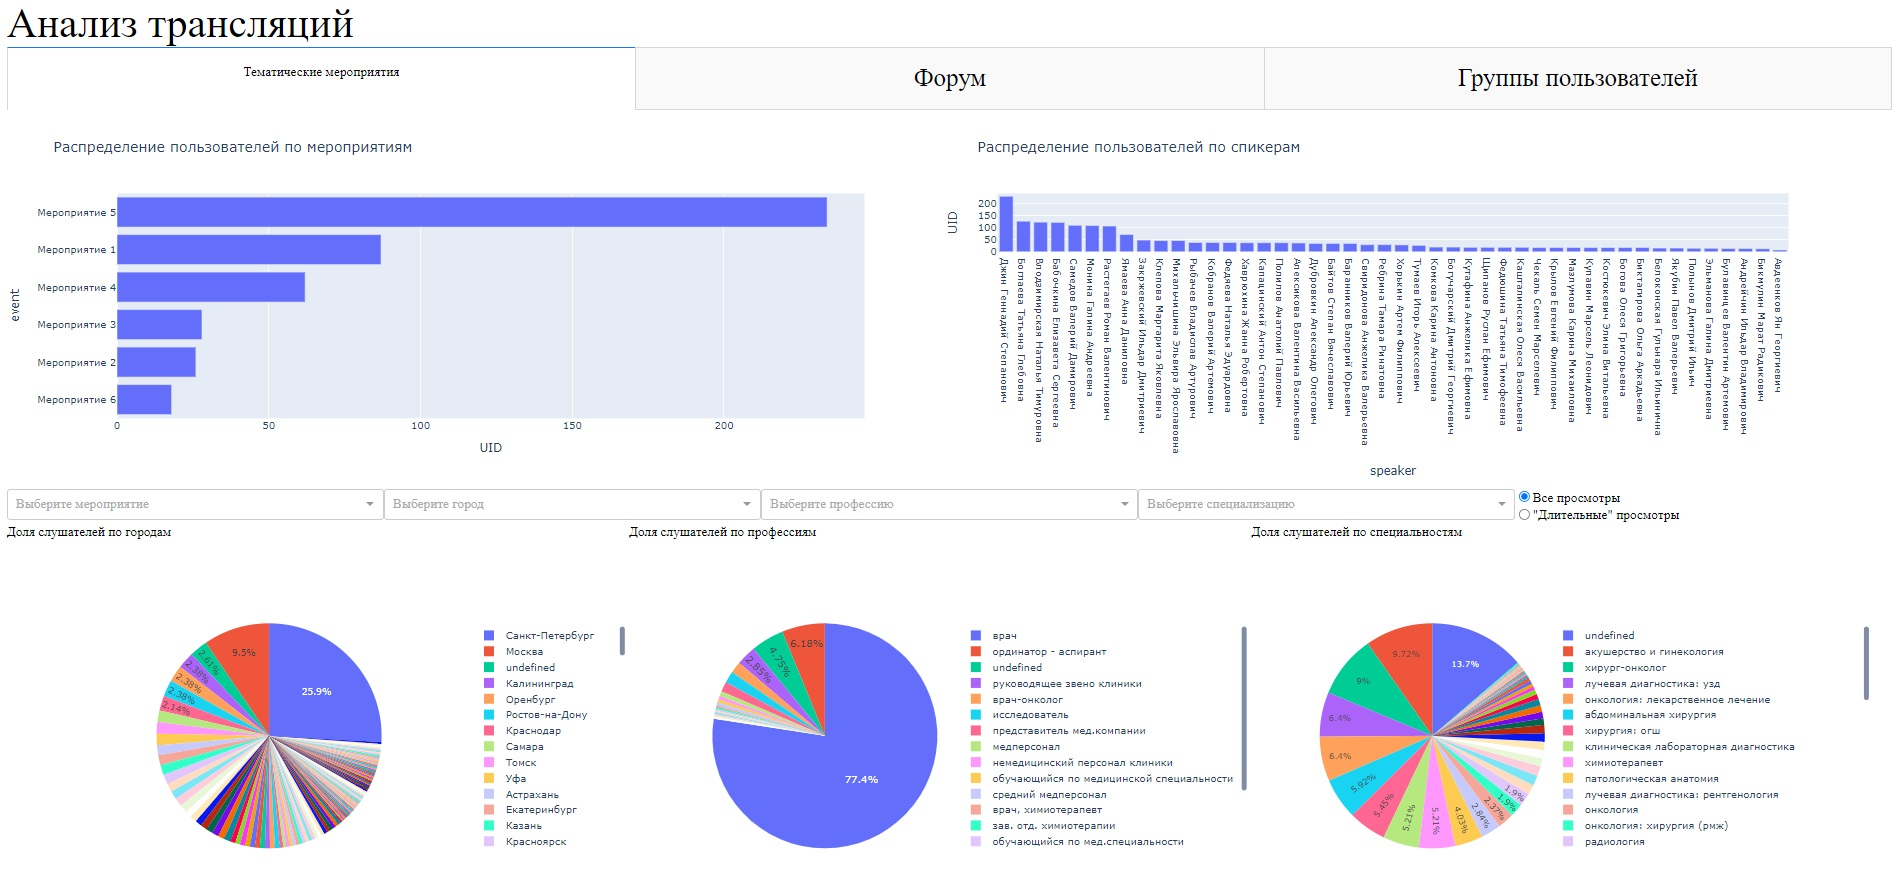

**Вкладка "Форум"**

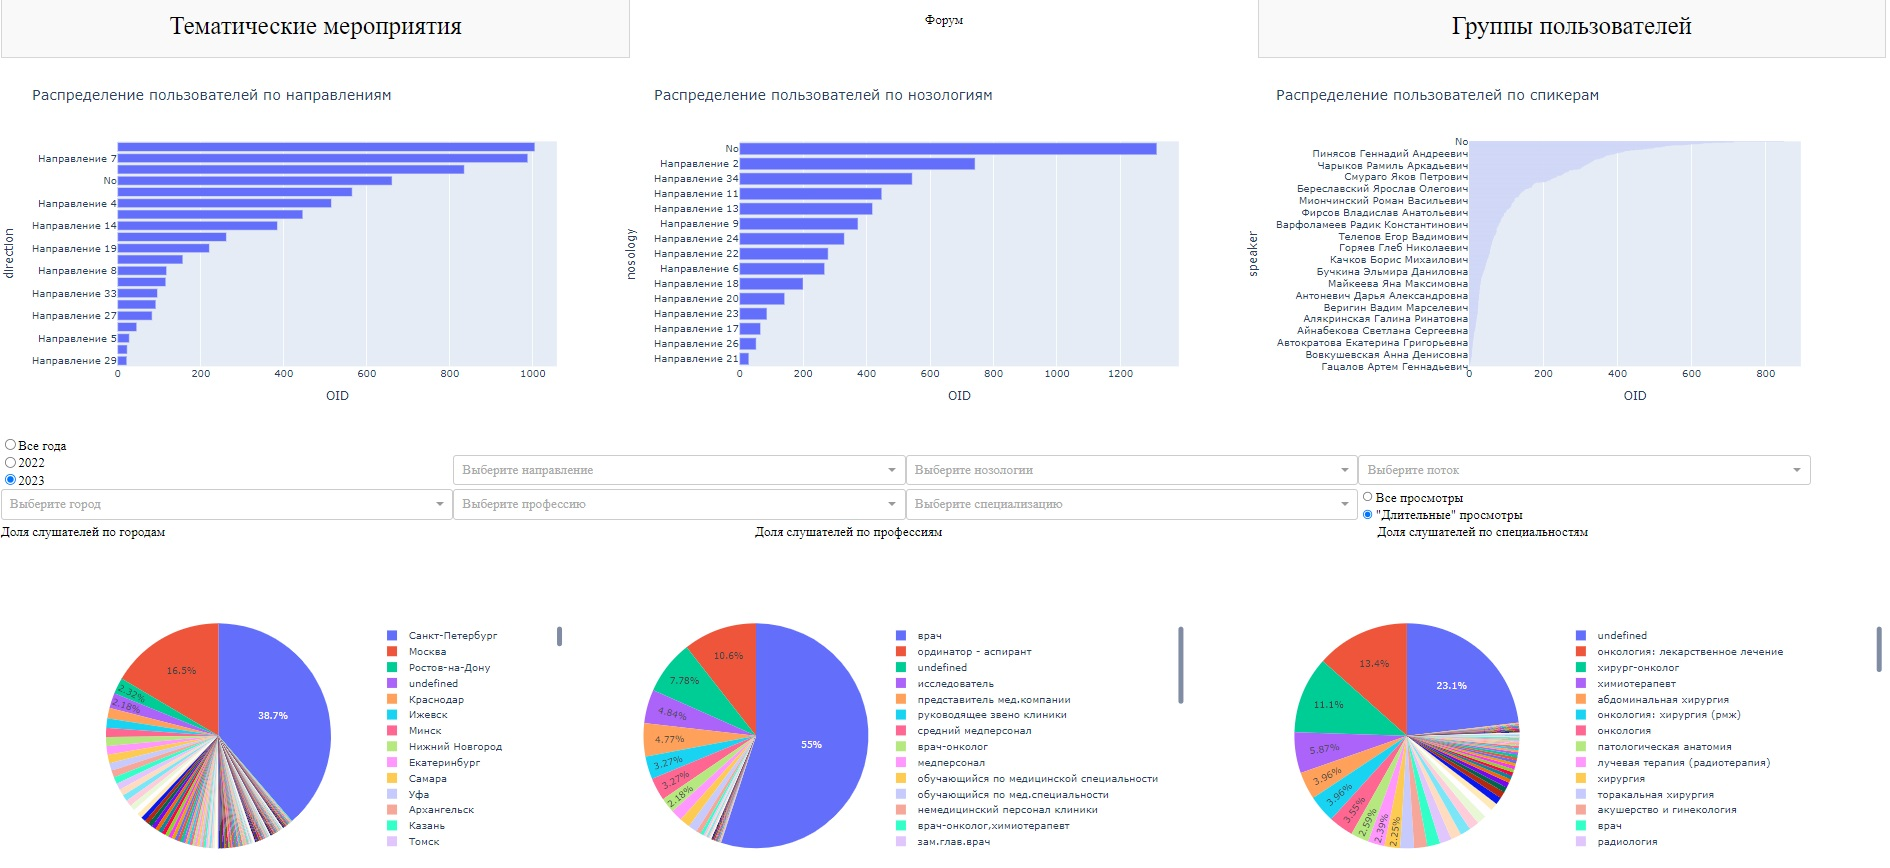

**Вкладка "Группы пользователей"**

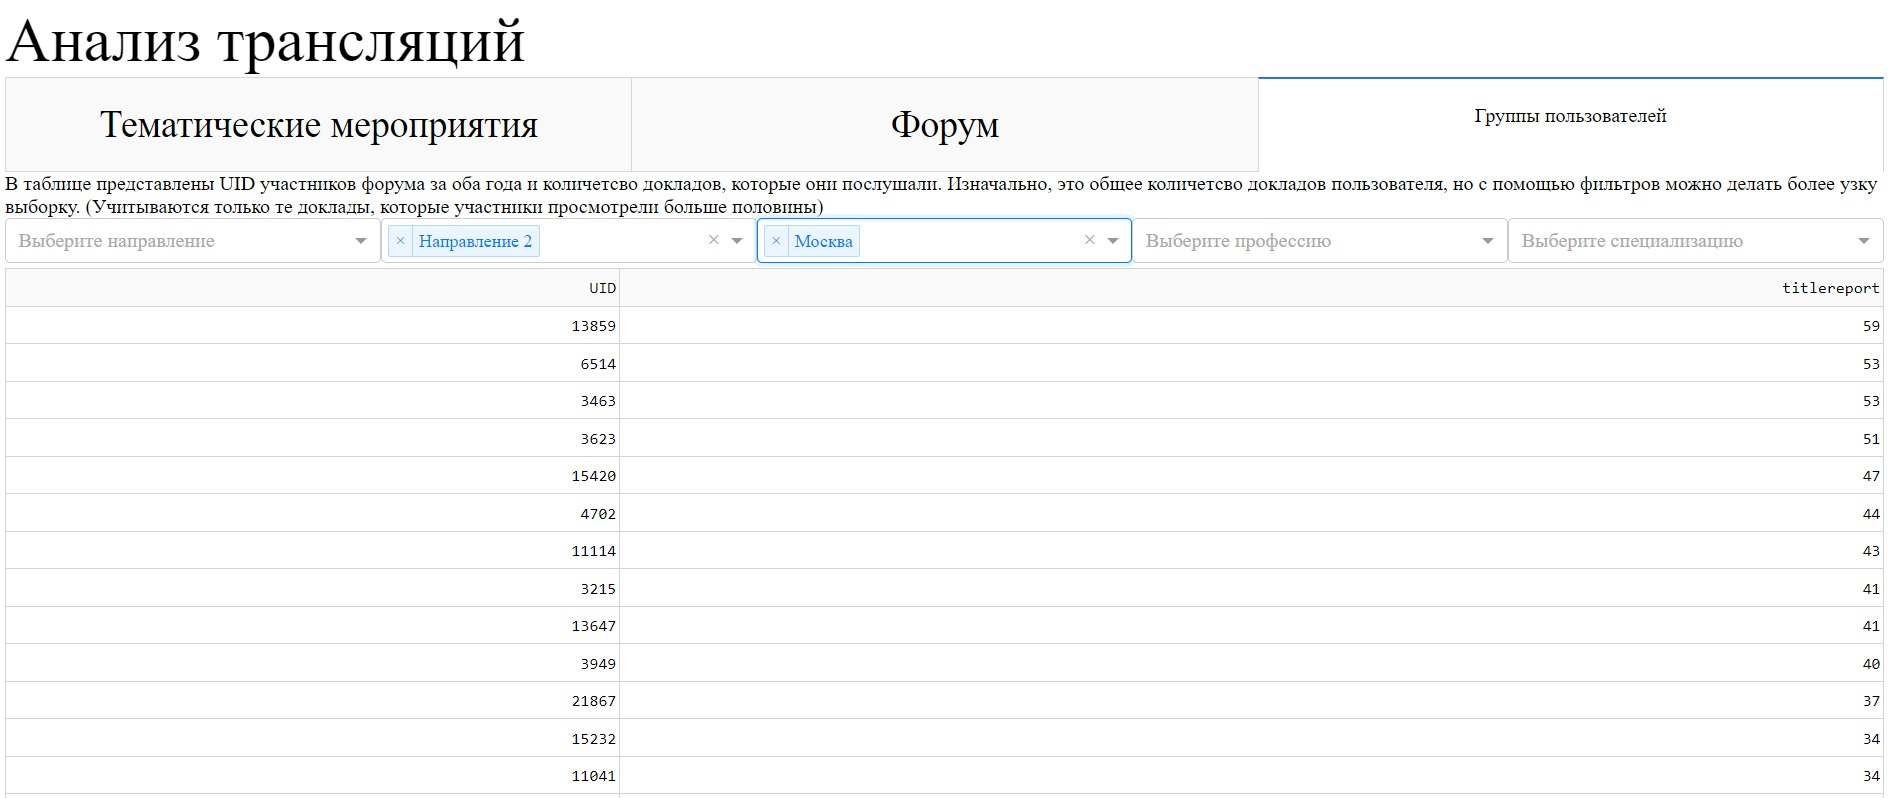

<a id='section5'></a>

## 5. Выводы и рекомендации

[К содержанию](#section0)

Для облегчения анализа данных в будущем рекомендуется:
 - указывать направлении и нозологии сразу в расписании лекций;
 - указание страны/региона/города не поле для ввода участником, а выбор из перечня;
 - создать справочник профессий и специальностей.
 
Есть пользователи, которые запускают просмотр одной и той же лекции с нескольких устройств одновременно, тем самым задваивая время просмотра. Желательно на техническом уровне убрать такую возможность.

*`Тематические мероприятия`*

Среди представленных 6 небольших тематических мероприятий, самым популярным было 5, а именно лекция 47 Джин Г.С. (на ней присутствовали почти все участники мероприятия). Остальные спикеры мероприятия собрали в 2 раза меньше слушателей, но все равно это больше, чем на других мероприятиях. 

Количество участников других тематических мероприятий сильно меньше, но часть слушателей, посмотревших больше половины лекции, у всех мероприятий превышает 70%. 

Лекция Хорькинa А.Ф. собрала 100% участников мероприятия 3.

У большинства спикеров посещение лекций составило больше 50% слушателей мероприятия.


*`Форум`*

Самыми популярными направлениями являются 3, 1 и 7.

Самыми менее популярными являются направления 29 и 32 (в 2022 году такого направления не было). По количеству слушателей посмотревших больше половины лекции, у направления 29 так же наименьшие показатели - 36,69%.

Самый большой процент пользоватлей долго смотревших лекцию у направлений 1 и 16.

Много строк содержит пропуски в столбце "направление", часть из них - это вступительные/заключительные слова. Но там так же присутсвуют и лекции, для которых не было указано направление. Поэтому выводы могут быть не совсем точны.

Спикеров у форума очень много. Наиболее информативно будет топ-спикеров в зависимости от направления. Это можно проанализировать на представленном дашборде.


Третья вкладка дашборда *`группа пользователей`* нужна для выявления пользователей по интересам. На ней таблица с UID пользователя и количеством лекций (которые он прослушал больше половины). Можно задавать интресующие направления/нозологии/города/профессии/специализации участников. В расчет берутся участники форума обоих годов. 